# **Proyecto DS para contribuir en la valoración de inmuebles en Madrid, para uso del sector inmobiliario.**

In [1]:
#Cargo archivo desde Google Drive
#from google.colab import drive
#import os
#drive.mount('/content/gdrive')
#%cd '/content/gdrive/MyDrive/Data_Science_CoderHouse/Entregable1_Datasets'
#Inmuebles_Madrid=pd.read_csv('Mercado_Inmobiliario_Madrid.csv',sep=',')

In [2]:
#Cargo librerías generales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Contexto comercial**
Una reconocida cadena inmobiliaria de España nos solicita una herramienta de predicción para tazar inmuebles para la venta, de modo de poder generar una rápida proyección en etapas iniciales para generar un informe y presentar a los clientes (dueños de las vidiendas), precindiendo de tazaciones realizadas por los profesionales idoneos.
Esta herramienta podrá generar las proyecciones correspondientes y compararlas con los precios pretendidos por los dueños, y en casos donde los valores sean similares, se podría directamente informar al cliente que el precio pretendido es acorde al mercado inmobiliario.
Por otro lado, se podrían agrupar las tasaciones en donde los precios sean muy dispares y solicitar a los profesionales correspondientes que realicen una tazación in-situ de la vivienda a modo de corroborar si se justifica el valor requerido por los clientes.(detectar posible falla en el algoritmo por falta de consideración de alguna variable)



# **Problema comercial**
¿Es posible generar una predicción de regresión para conocer el valor de venta certero de los inmuebles en venta?¿Alcanza con las variables disponibles o se deberían buscar conocer nuevas variables?¿Los dueños de las viviendas pretenden obtener un valor monetario similar a lo que ofrece el mercado?

# **Definición de objetivo**
Poder predecir el precio de venta aproximado de nuevas viviendas que ingresen al mercado, de forma de determinar un valor justo de venta para informar a los clientes de una inmobiliaria.
Muchas veces los clientes suelen inflar el precio que pretenden por sus viviendas debido al valor afectivo, por lo tanto esta herramienta ayudará a controlar la especulación inmobiliaria.


# **Análisis primario del Dataset**

In [3]:
#cargado desde Github
Inmuebles_Madrid=pd.read_csv("https://raw.githubusercontent.com/Jgorostiza/CoderHouse_DS/main/Mercado_Inmobiliario_Madrid.csv")



Inmuebles_Madrid.head()

Unnamed: 0     id                                              title  \
0           0  21742              Piso en venta en calle de Godella, 64   
1           1  21741   Piso en venta en calle de la del Manojo de Rosas   
2           2  21740               Piso en venta en calle del Talco, 68   
3           3  21739               Piso en venta en calle Pedro Jiménez   
4           4  21738  Piso en venta en carretera de Villaverde a Val...   

                subtitle  sq_mt_built  sq_mt_useful  n_rooms  n_bathrooms  \
0  San Cristóbal, Madrid         64.0          60.0        2          1.0   
1    Los Ángeles, Madrid         70.0           NaN        3          1.0   
2     San Andrés, Madrid         94.0          54.0        2          2.0   
3     San Andrés, Madrid         64.0           NaN        2          1.0   
4    Los Rosales, Madrid        108.0          90.0        2          2.0   

   n_floors  sq_mt_allotment  ...  energy_certificate  has_parking  \
0       NaN              NaN  ...                   D            0   
1       NaN              NaN  ...          en trámite            0   
2       NaN              NaN  ...         no indicado            0   
3       NaN              NaN  ...          en trámite            0   
4       NaN              NaN  ...          en trámite            1   

  has_private_parking  has_public_parking is_parking_included_in_price  \
0                 NaN                 NaN                          NaN   
1                 NaN                 NaN                          NaN   
2                 NaN                 NaN                          NaN   
3                 NaN                 NaN                          NaN   
4                 NaN                 NaN                          1.0   

  parking_price  is_orientation_north is_orientation_west  \
0           NaN                   0.0                 1.0   
1           NaN                   NaN                 NaN   
2           NaN                   NaN                 NaN   
3           NaN                   0.0                 0.0   
4           0.0                   1.0                 1.0   

   is_orientation_south  is_orientation_east  
0                   0.0                  0.0  
1                   NaN                  NaN  
2                   NaN                  NaN  
3                   1.0                  0.0  
4                   1.0                  1.0  

[5 rows x 58 columns]

# **Contexto analítico**
En este dataset contamos con la variable precio de venta, que es la que intentaré predecir para futuros inmuebles. De todos modos podría realizar un agrupamiento para analizar el resultado a trávés de un método de algoritmo no supervisado, de forma tal vez de encontrar situaciones atípicas para descartarlas del modelo, u otros patrones de agrupamiento que no son visibles a simle vista. Sería como un analisis exploratorio para ver si el resultado ayuda a tomar acciones en el modelo supervisado.

## **Un poco de transformación de datos para ordernar el Dataset**

In [4]:
#Reemplazo NaN por 0
Inmuebles_Madrid['built_year'] = Inmuebles_Madrid.loc[:,'built_year'].fillna(value=0,downcast='int')
Inmuebles_Madrid['n_bathrooms']= Inmuebles_Madrid.loc[:,'n_bathrooms'].fillna(value=0,downcast='int')

In [5]:
Inmuebles_Madrid['built_year'].head()

0    1960
1       0
2       0
3    1955
4    2003
Name: built_year, dtype: int64

In [6]:
#filtro atipicos en año de construcción
filteraño=(Inmuebles_Madrid.built_year>1950) & (Inmuebles_Madrid.built_year<2024)
Inmuebles_Madrid_2=Inmuebles_Madrid[filteraño]
Inmuebles_Madrid_2.reset_index(drop=True,inplace=True)

In [ ]:
# Agrupo Orientación
Inmuebles_Madrid_2['Orientación']=np.nan
sun1= (Inmuebles_Madrid_2.is_orientation_north==True)
sun2= (Inmuebles_Madrid_2.is_orientation_west==True)
sun3= (Inmuebles_Madrid_2.is_orientation_south==True)
sun4= (Inmuebles_Madrid_2.is_orientation_east==True)
Esun1='Norte'
Esun2='Oeste'
Esun3='Sur'
Esun4='Este'
Inmuebles_Madrid_2.loc[sun1,'Orientación'] = Esun1
Inmuebles_Madrid_2.loc[sun2,'Orientación'] = Esun2
Inmuebles_Madrid_2.loc[sun3,'Orientación'] = Esun3
Inmuebles_Madrid_2.loc[sun4,'Orientación'] = Esun4

In [ ]:
# Agrupo Metraje
Inmuebles_Madrid_2['Mt2_Agrupado']=np.nan
FMts1=(Inmuebles_Madrid_2.sq_mt_built>0) & (Inmuebles_Madrid_2.sq_mt_built<100)
FMts2=(Inmuebles_Madrid_2.sq_mt_built>=100) & (Inmuebles_Madrid_2.sq_mt_built<200)
FMts3=(Inmuebles_Madrid_2.sq_mt_built>=200) & (Inmuebles_Madrid_2.sq_mt_built<300)
FMts4=(Inmuebles_Madrid_2.sq_mt_built>=300) & (Inmuebles_Madrid_2.sq_mt_built<400)
FMts5=(Inmuebles_Madrid_2.sq_mt_built>=400)
E1='<100'
E2='100-200'
E3='200-300'
E4='300-400'
E5='>400'
Inmuebles_Madrid_2.loc[FMts1,'Mt2_Agrupado'] = E1
Inmuebles_Madrid_2.loc[FMts2,'Mt2_Agrupado'] = E2
Inmuebles_Madrid_2.loc[FMts3,'Mt2_Agrupado'] = E3
Inmuebles_Madrid_2.loc[FMts4,'Mt2_Agrupado'] = E4
Inmuebles_Madrid_2.loc[FMts5,'Mt2_Agrupado'] = E5

In [ ]:
#Filtro operación de compra
Fo=Inmuebles_Madrid_2.operation=='sale'
Eventa='Venta'
Inmuebles_Madrid_2.loc[Fo,'Operación'] = Eventa
Inmuebles_Madrid_2.Operación.head()

In [ ]:
# Agrupo cuartos
Inmuebles_Madrid_2['Dormitorios']=np.nan
Inmuebles_Madrid_2['n_rooms']=Inmuebles_Madrid_2['n_rooms'].astype('int64')
room1= (Inmuebles_Madrid_2.n_rooms==0)
room2= (Inmuebles_Madrid_2.n_rooms==1)
room3= (Inmuebles_Madrid_2.n_rooms==2)
room4= (Inmuebles_Madrid_2.n_rooms==3)
room5= (Inmuebles_Madrid_2.n_rooms==4)
room6= (Inmuebles_Madrid_2.n_rooms==5)
room7= (Inmuebles_Madrid_2.n_rooms==6)
room8= (Inmuebles_Madrid_2.n_rooms > 7)
ER1='Mono'
ER2='1'
ER3='2'
ER4='3'
ER5='4'
ER6='5'
ER7='6'
ER8='>6'
Inmuebles_Madrid_2.loc[room1,'Dormitorios'] = ER1
Inmuebles_Madrid_2.loc[room2,'Dormitorios'] = ER2
Inmuebles_Madrid_2.loc[room3,'Dormitorios'] = ER3
Inmuebles_Madrid_2.loc[room4,'Dormitorios'] = ER4
Inmuebles_Madrid_2.loc[room5,'Dormitorios'] = ER5
Inmuebles_Madrid_2.loc[room6,'Dormitorios'] = ER6
Inmuebles_Madrid_2.loc[room7,'Dormitorios'] = ER7
Inmuebles_Madrid_2.loc[room8,'Dormitorios'] = ER8
Inmuebles_Madrid_2.loc[:,'Dormitorios'] = Inmuebles_Madrid_2.Dormitorios.fillna(value='S/D', inplace=False)


In [11]:
Inmuebles_Madrid_2['Dormitorios']

0       2
1       2
2       2
3       4
4       2
       ..
7953    5
7954    2
7955    2
7956    4
7957    4
Name: Dormitorios, Length: 7958, dtype: object

In [ ]:
#Agrupo años
Inmuebles_Madrid_2['Año_Agrupado']=np.nan
Inmuebles_Madrid_2['Año_Agrupado'] = Inmuebles_Madrid_2.Año_Agrupado.fillna(value=0, inplace=False)

F1950=(Inmuebles_Madrid_2.built_year>0) & (Inmuebles_Madrid_2.built_year<1960)
F1960=(Inmuebles_Madrid_2.built_year>=1960) & (Inmuebles_Madrid_2.built_year<1970)
F1970=(Inmuebles_Madrid_2.built_year>=1970) & (Inmuebles_Madrid_2.built_year<1980)
F1980=(Inmuebles_Madrid_2.built_year>=1980) & (Inmuebles_Madrid_2.built_year<1990)
F1990=(Inmuebles_Madrid_2.built_year>=1990) & (Inmuebles_Madrid_2.built_year<2000)
F2000=(Inmuebles_Madrid_2.built_year>=2000) & (Inmuebles_Madrid_2.built_year<2010)
F2010=(Inmuebles_Madrid_2.built_year>=2010) & (Inmuebles_Madrid_2.built_year<2020)
F2020=(Inmuebles_Madrid_2.built_year>=2020)
Inmuebles_Madrid_2.loc[F1950,'Año_Agrupado'] = 1950
Inmuebles_Madrid_2.loc[F1960,'Año_Agrupado'] = 1960
Inmuebles_Madrid_2.loc[F1970,'Año_Agrupado'] = 1970
Inmuebles_Madrid_2.loc[F1980,'Año_Agrupado'] = 1980
Inmuebles_Madrid_2.loc[F1990,'Año_Agrupado'] = 1990
Inmuebles_Madrid_2.loc[F2000,'Año_Agrupado'] = 2000
Inmuebles_Madrid_2.loc[F2010,'Año_Agrupado'] = 2010
Inmuebles_Madrid_2.loc[F2020,'Año_Agrupado'] = 2020
Inmuebles_Madrid_2['Año_Agrupado']=Inmuebles_Madrid_2['Año_Agrupado'].astype('int64')

In [ ]:
#Selecciono variables más importantes (Dataset Resumido)
Dset_Madrid=Inmuebles_Madrid_2[['subtitle','sq_mt_built','n_rooms','n_bathrooms','buy_price','buy_price_by_area','house_type_id','Año_Agrupado','Operación','has_garden','has_pool','has_parking','Orientación','Mt2_Agrupado']]


#Renombro variables
renombro={'subtitle':'Barrio','sq_mt_built': 'Metraje','n_rooms': 'Nro_cuartos','n_bathrooms': 'Nro_baños','buy_price': 'Precio_venta','buy_price_by_area':'PrecioxM2','house_type_id': 'Tipología','has_garden': 'Jardín','has_pool': 'Piscina','has_parking':'Garage'}
Dset_Madrid.rename(columns=renombro, inplace=True)



**En el contexto de predecir el precio de viviendas en la ciudad de Madrid, España, se pueden plantear diversas hipótesis utilizando las variables seleccionadas anteriormente.**

**Estas variables incluyen el barrio, el metraje de la vivienda, el precio por metro cuadrado, el número de dormitorios, el número de baños, si la vivienda cuenta con cochera, la tipología de la vivienda y la orientación de la misma. A continuación, se presentan algunas hipótesis que podrían ayudar a predecir el precio de las viviendas en Madrid:**



# 1- Hipótesis del impacto del barrio:
Se puede plantear la hipótesis de que el precio de las viviendas variará dependiendo del barrio en el que se encuentren. Barrios exclusivos o con una alta demanda podrían tener un impacto positivo en el precio, mientras que aquellos con menos demanda o menor atractivo podrían influir negativamente.



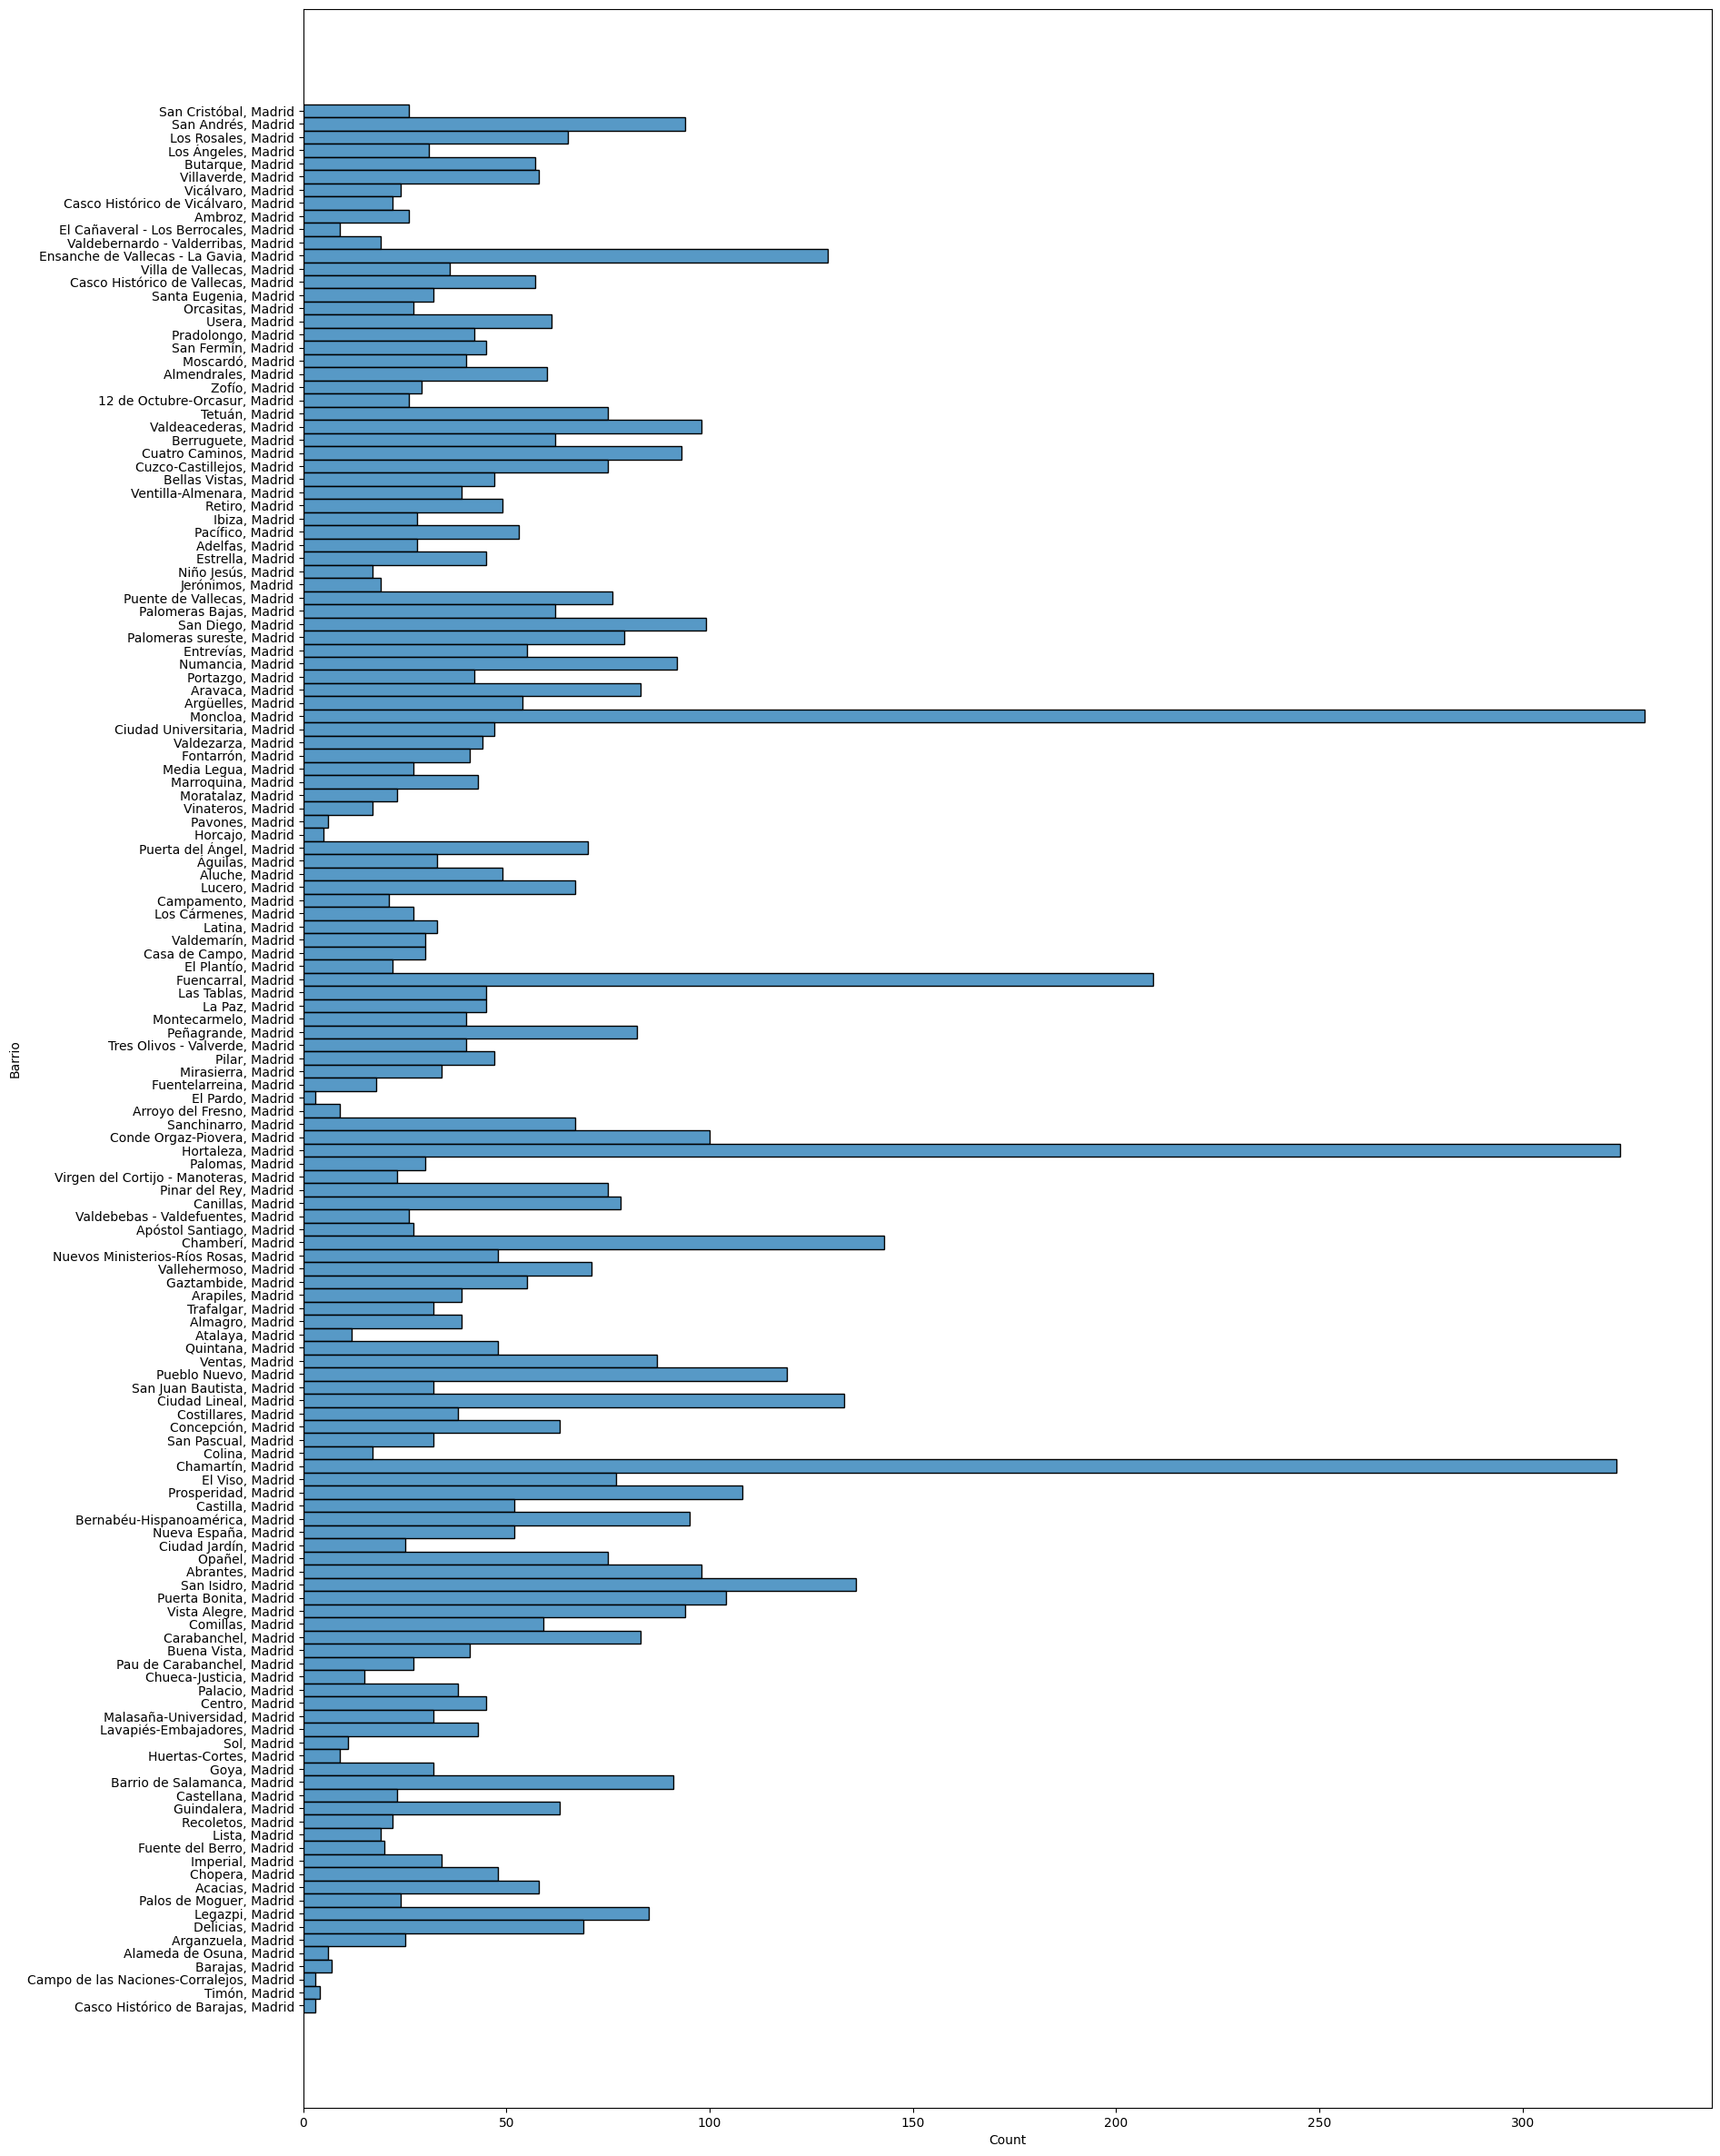

In [14]:
fig, ax = plt.subplots(figsize=(20, 30))
ax=sns.histplot(data=Dset_Madrid, y="Barrio")

En el grafico se observa la cantidad de viviendas en venta por barrio. Podemos pensar que en barrios con menor cantidad de viviendas a la venta, significa un mayor costo de venta, dado la ley de oferta y demanda.
Aunque pensandolo desde otra perspectiva, también se podría pensar que en un barrio donde hay mucha oferta de venta, podría corresponder a dos factores:
que haya mucha construcción y por lo tanto mucha oferta dado el crecimiento exponencial del barrio, o se puede pensar que es un barrio en donde es muy díficil vender debido al contexto en donde se encuentra, y por lo tanto la oferta es mayor dado el estancamiento de las transacciones de venta.
En esta situación sería muy interesante agregar la variable Año de construcción, para poder afinar más la casuistica.

# 2- Hipótesis del metraje de vivienda:
Se podría hipotetizar que el precio de la vivienda aumenta a medida que aumenta el metraje de la misma. Esto se basa en la suposición de que una mayor área construida se considera un factor de lujo y comodidad.



<Axes: xlabel='Metraje', ylabel='Precio_venta'>

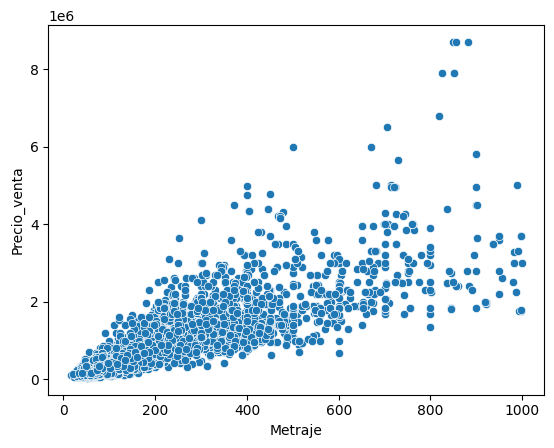

In [15]:
sns.scatterplot(x="Metraje",y="Precio_venta",data=Dset_Madrid)

Se observa en el grafico una pendiente positiva; a mayor cantidad de metros construidos, el precio de venta aumenta.

# 3- Hipótesis del precio por metro cuadrado:
Es posible plantear la hipótesis de que el precio por metro cuadrado influirá directamente en el precio total de la vivienda. Un precio más alto por metro cuadrado podría aumentar el precio total, mientras que un precio más bajo podría disminuirlo.



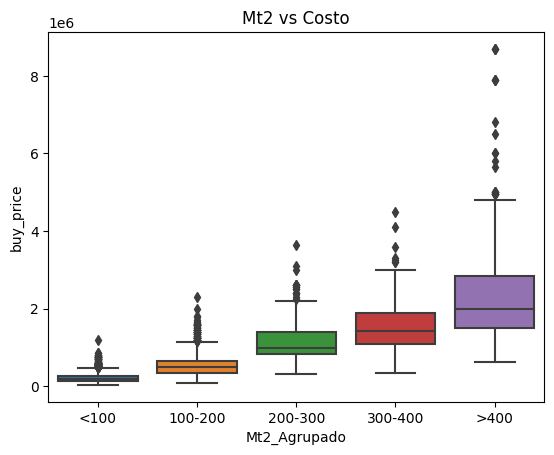

In [16]:
sns.boxplot(x='Mt2_Agrupado', y = 'buy_price', data = Inmuebles_Madrid_2)
plt.title("Mt2 vs Costo");

# 4- Hipótesis del número de dormitorios y baños:
Se podría hipotetizar que el número de dormitorios y baños afecta el precio de la vivienda. Un mayor número de dormitorios y baños podría estar asociado con un mayor precio, ya que proporciona más espacio y comodidad.



<Axes: xlabel='Nro_baños', ylabel='Precio_venta'>

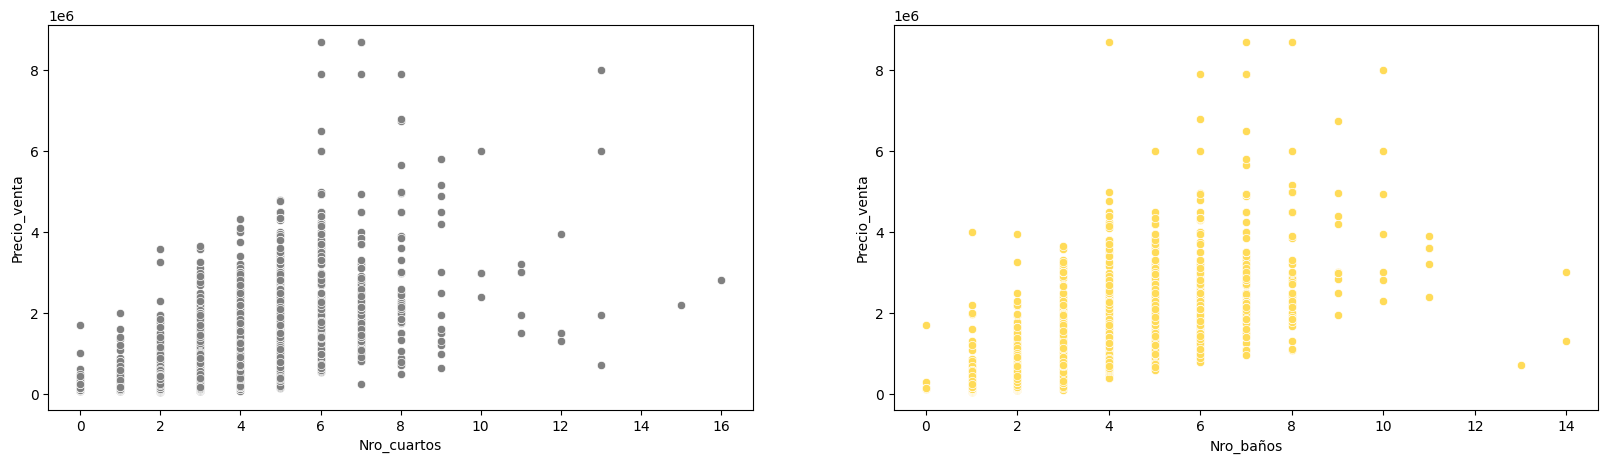

In [17]:
f, axs = plt.subplots(1,2, figsize=(20, 5))
sns.scatterplot(x="Nro_cuartos",y="Precio_venta",data=Dset_Madrid,ax=axs[0],color='grey')
sns.scatterplot(x="Nro_baños",y="Precio_venta",data=Dset_Madrid,ax=axs[1],color='#FFDB58')

In [18]:
Dset_Madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7958 entries, 0 to 7957
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Barrio        7958 non-null   object 
 1   Metraje       7904 non-null   float64
 2   Nro_cuartos   7958 non-null   int64  
 3   Nro_baños     7958 non-null   int64  
 4   Precio_venta  7958 non-null   int64  
 5   PrecioxM2     7958 non-null   int64  
 6   Tipología     7816 non-null   object 
 7   Año_Agrupado  7958 non-null   int64  
 8   Operación     7958 non-null   object 
 9   Jardín        811 non-null    float64
 10  Piscina       2369 non-null   float64
 11  Garage        7958 non-null   int64  
 12  Orientación   5296 non-null   object 
 13  Mt2_Agrupado  7904 non-null   object 
dtypes: float64(3), int64(6), object(5)
memory usage: 870.5+ KB


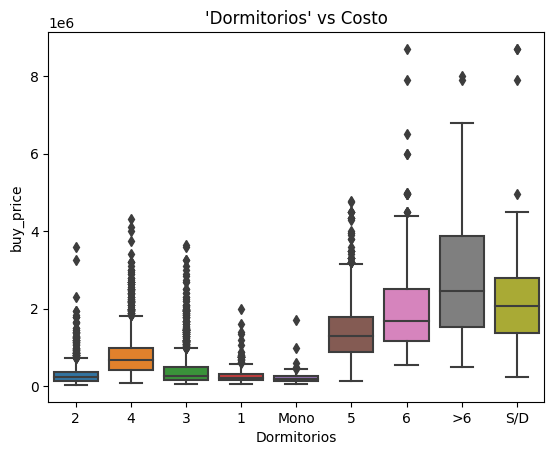

In [19]:
sns.boxplot(x='Dormitorios', y = 'buy_price', data = Inmuebles_Madrid_2)
plt.title("'Dormitorios' vs Costo");

# 5- Hipótesis de la cochera:
Se podría plantear la hipótesis de que la presencia de una cochera o estacionamiento en la vivienda podría aumentar el precio. La disponibilidad de estacionamiento es un factor importante para muchas personas al elegir una vivienda, especialmente en áreas urbanas.


<Axes: xlabel='Garage', ylabel='Count'>

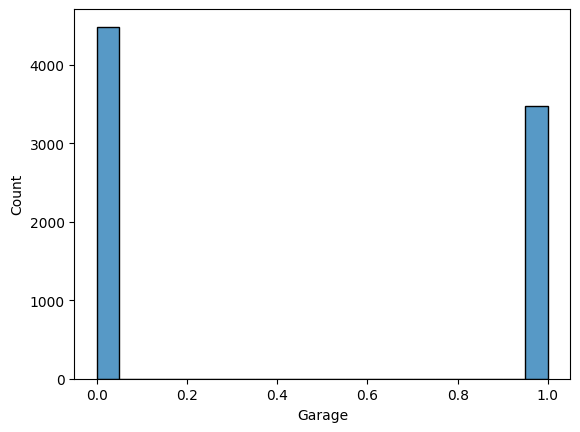

In [20]:
sns.histplot(data=Dset_Madrid, x="Garage",bins=20)

# 6- Hipótesis de la tipología de la vivienda:
Se podría hipotetizar que la tipología de la vivienda (por ejemplo, apartamento, casa adosada, ático) podría influir en el precio. Ciertas tipologías podrían ser más demandadas y, por lo tanto, tener un impacto positivo en el precio.



# 7- Hipótesis de la orientación de la vivienda:
Se podría plantear la hipótesis de que la orientación de la vivienda (por ejemplo, sur, norte, este, oeste) podría afectar el precio. Algunas orientaciones pueden recibir más luz natural o tener mejores vistas, lo que podría influir en el precio.


<ipython-input-21-951f44ef484d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Grupo_orientación=Dset_Madrid.groupby(['Orientación']).mean()


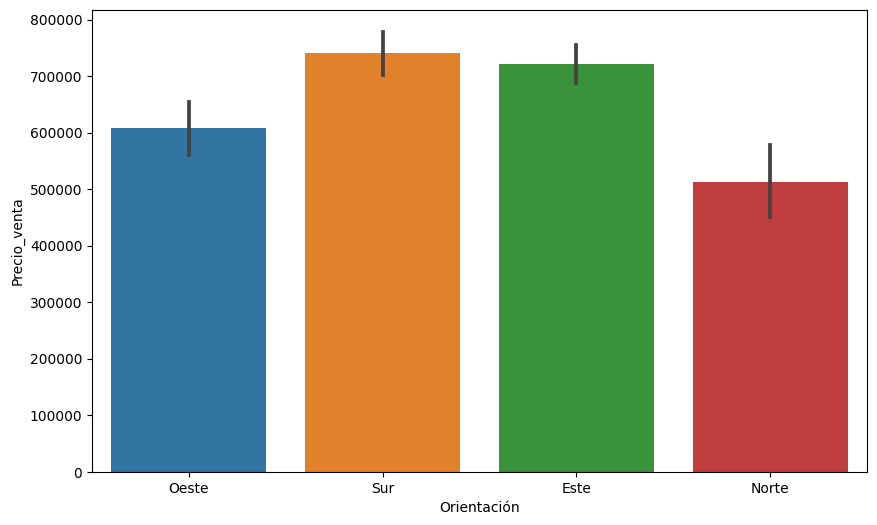

In [21]:
Grupo_orientación=Dset_Madrid.groupby(['Orientación']).mean()
PromedioxOrientación=Grupo_orientación.Precio_venta

plt.figure(figsize=(10,6))
sns.barplot(y='Precio_venta',x='Orientación',data=Dset_Madrid);

Grafico:Variaciones de precio en base a la orientación

# 8- Hipótesis de la antiguedad de la vivienda:
Cuanto más nueva es la vivienda, requerirá menor mantenimiento y por lo tanto el precio de venta será mayor, o influirá negativamente en caso contrario.

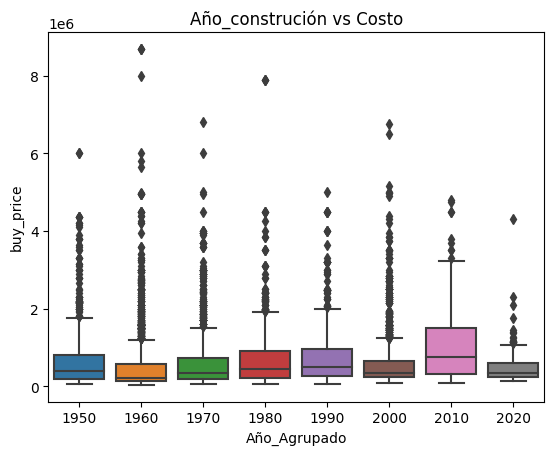

In [22]:
sns.boxplot(x='Año_Agrupado', y = 'buy_price', data = Inmuebles_Madrid_2)
plt.title("Año_construción vs Costo");

In [23]:
# Codificación de Orientación para trabajar como variable numérica
Dset_Madrid['OrientaciónCod']=np.nan
Oeste=Dset_Madrid.Orientación=='Oeste'
Norte=Dset_Madrid.Orientación=='Norte'
Este=Dset_Madrid.Orientación=='Este'
Sur=Dset_Madrid.Orientación=='Sur'
O1='1'
O2='2'
O3='3'
O4='4'
Dset_Madrid.loc[Oeste,'OrientaciónCod'] = O1
Dset_Madrid.loc[Norte,'OrientaciónCod'] = O2
Dset_Madrid.loc[Este,'OrientaciónCod'] = O3
Dset_Madrid.loc[Sur,'OrientaciónCod'] = O4

<ipython-input-23-b42131eedf96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dset_Madrid['OrientaciónCod']=np.nan


# **Exploración de datos (EDA)**
Dado el análisis preliminar, podemos decir que los factores que influyen en el precio de un inmueble podrían ser, el metraje, cantidad de dormitorios y baños, la ubicación, la antiguedad de la construcción, si presenta comodadades como cochera o piscina, el tipo de vivienda.
Analizaré alguna de estas variables.

# **Análisis descriptivo del Dataset**

In [24]:
Dset_Madrid.describe().T

count           mean            std      min       25%  \
Metraje       7904.0     158.308072     148.094898     16.0      72.0   
Nro_cuartos   7958.0       3.129178       1.510851      0.0       2.0   
Nro_baños     7958.0       2.183840       1.511883      0.0       1.0   
Precio_venta  7958.0  647234.741895  784437.135372  36000.0  180000.0   
PrecioxM2     7958.0    3629.537949    1672.160561    706.0    2354.0   
Año_Agrupado  7958.0    1977.378738      18.580790   1950.0    1960.0   
Jardín         811.0       1.000000       0.000000      1.0       1.0   
Piscina       2369.0       1.000000       0.000000      1.0       1.0   
Garage        7958.0       0.436291       0.495956      0.0       0.0   

                   50%        75%        max  
Metraje          101.0     175.00      999.0  
Nro_cuartos        3.0       4.00       16.0  
Nro_baños          2.0       3.00       14.0  
Precio_venta  350000.0  775000.00  8700000.0  
PrecioxM2       3354.5    4479.75    14542.0  
Año_Agrupado    1970.0    2000.00     2020.0  
Jardín             1.0       1.00        1.0  
Piscina            1.0       1.00        1.0  
Garage             0.0       1.00        1.0

**PRE-PROCESAMIENTO DE DATOS**

In [ ]:
#Genero casos de entrenamiento y prueba
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1, random_state=0, test_size=0.3)
for train_index, test_index in ss.split(Dset_Madrid):
    print(len(train_index))
    print(len(test_index))
Dset_Madrid['Train'] = 0
Dset_Madrid.loc[Dset_Madrid.index.isin(train_index),'Train'] = 1

In [26]:
#Verifico columna entrenamiento
Dset_Madrid.head()

Barrio  Metraje  Nro_cuartos  Nro_baños  Precio_venta  \
0  San Cristóbal, Madrid     64.0            2          1         85000   
1     San Andrés, Madrid     64.0            2          1        109900   
2    Los Rosales, Madrid    108.0            2          2        260000   
3     San Andrés, Madrid    126.0            4          2        195000   
4     San Andrés, Madrid     69.0            2          2        118000   

   PrecioxM2           Tipología  Año_Agrupado Operación  Jardín  Piscina  \
0       1328  HouseType 1: Pisos          1960     Venta     NaN      NaN   
1       1717  HouseType 1: Pisos          1950     Venta     NaN      NaN   
2       2407  HouseType 1: Pisos          2000     Venta     NaN      1.0   
3       1548  HouseType 1: Pisos          1980     Venta     NaN      NaN   
4       1710  HouseType 1: Pisos          1960     Venta     NaN      NaN   

   Garage Orientación Mt2_Agrupado OrientaciónCod  Train  
0       0       Oeste         <100              1      1  
1       0         Sur         <100              4      0  
2       1        Este      100-200              3      1  
3       1        Este      100-200              3      1  
4       0         NaN         <100            NaN      1

In [27]:
#Genero filtro Entrenamiento
Datos_Entrenamiento = Dset_Madrid.loc[:,'Train'] == 1

In [28]:
#Visualizo filtro
Entrenamiento=Dset_Madrid[Datos_Entrenamiento]
Entrenamiento.head()


Barrio  Metraje  Nro_cuartos  Nro_baños  Precio_venta  \
0  San Cristóbal, Madrid     64.0            2          1         85000   
2    Los Rosales, Madrid    108.0            2          2        260000   
3     San Andrés, Madrid    126.0            4          2        195000   
4     San Andrés, Madrid     69.0            2          2        118000   
5    Los Rosales, Madrid    123.0            3          2        195000   

   PrecioxM2           Tipología  Año_Agrupado Operación  Jardín  Piscina  \
0       1328  HouseType 1: Pisos          1960     Venta     NaN      NaN   
2       2407  HouseType 1: Pisos          2000     Venta     NaN      1.0   
3       1548  HouseType 1: Pisos          1980     Venta     NaN      NaN   
4       1710  HouseType 1: Pisos          1960     Venta     NaN      NaN   
5       1585  HouseType 1: Pisos          1990     Venta     NaN      NaN   

   Garage Orientación Mt2_Agrupado OrientaciónCod  Train  
0       0       Oeste         <100              1      1  
2       1        Este      100-200              3      1  
3       1        Este      100-200              3      1  
4       0         NaN         <100            NaN      1  
5       0        Este      100-200              3      1

# **Analizo valores nulos**

In [29]:
Entrenamiento.isnull().sum()

Barrio               0
Metraje             31
Nro_cuartos          0
Nro_baños            0
Precio_venta         0
PrecioxM2            0
Tipología           97
Año_Agrupado         0
Operación            0
Jardín            5008
Piscina           3895
Garage               0
Orientación       1848
Mt2_Agrupado        31
OrientaciónCod    1848
Train                0
dtype: int64

Existen valores nulos en muchas variables.

In [30]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
Porcentaje_nulos=(Entrenamiento.isnull().sum()/Dset_Madrid.shape[0])*100
Porcentaje_nulos=Porcentaje_nulos.sort_values(ascending=False)
Porcentaje_nulos= Porcentaje_nulos[Porcentaje_nulos>0]
Porcentaje_nulos

Jardín            62.930385
Piscina           48.944458
Orientación       23.221915
OrientaciónCod    23.221915
Tipología          1.218899
Metraje            0.389545
Mt2_Agrupado       0.389545
dtype: float64

In [31]:
import missingno as msno

<Axes: >

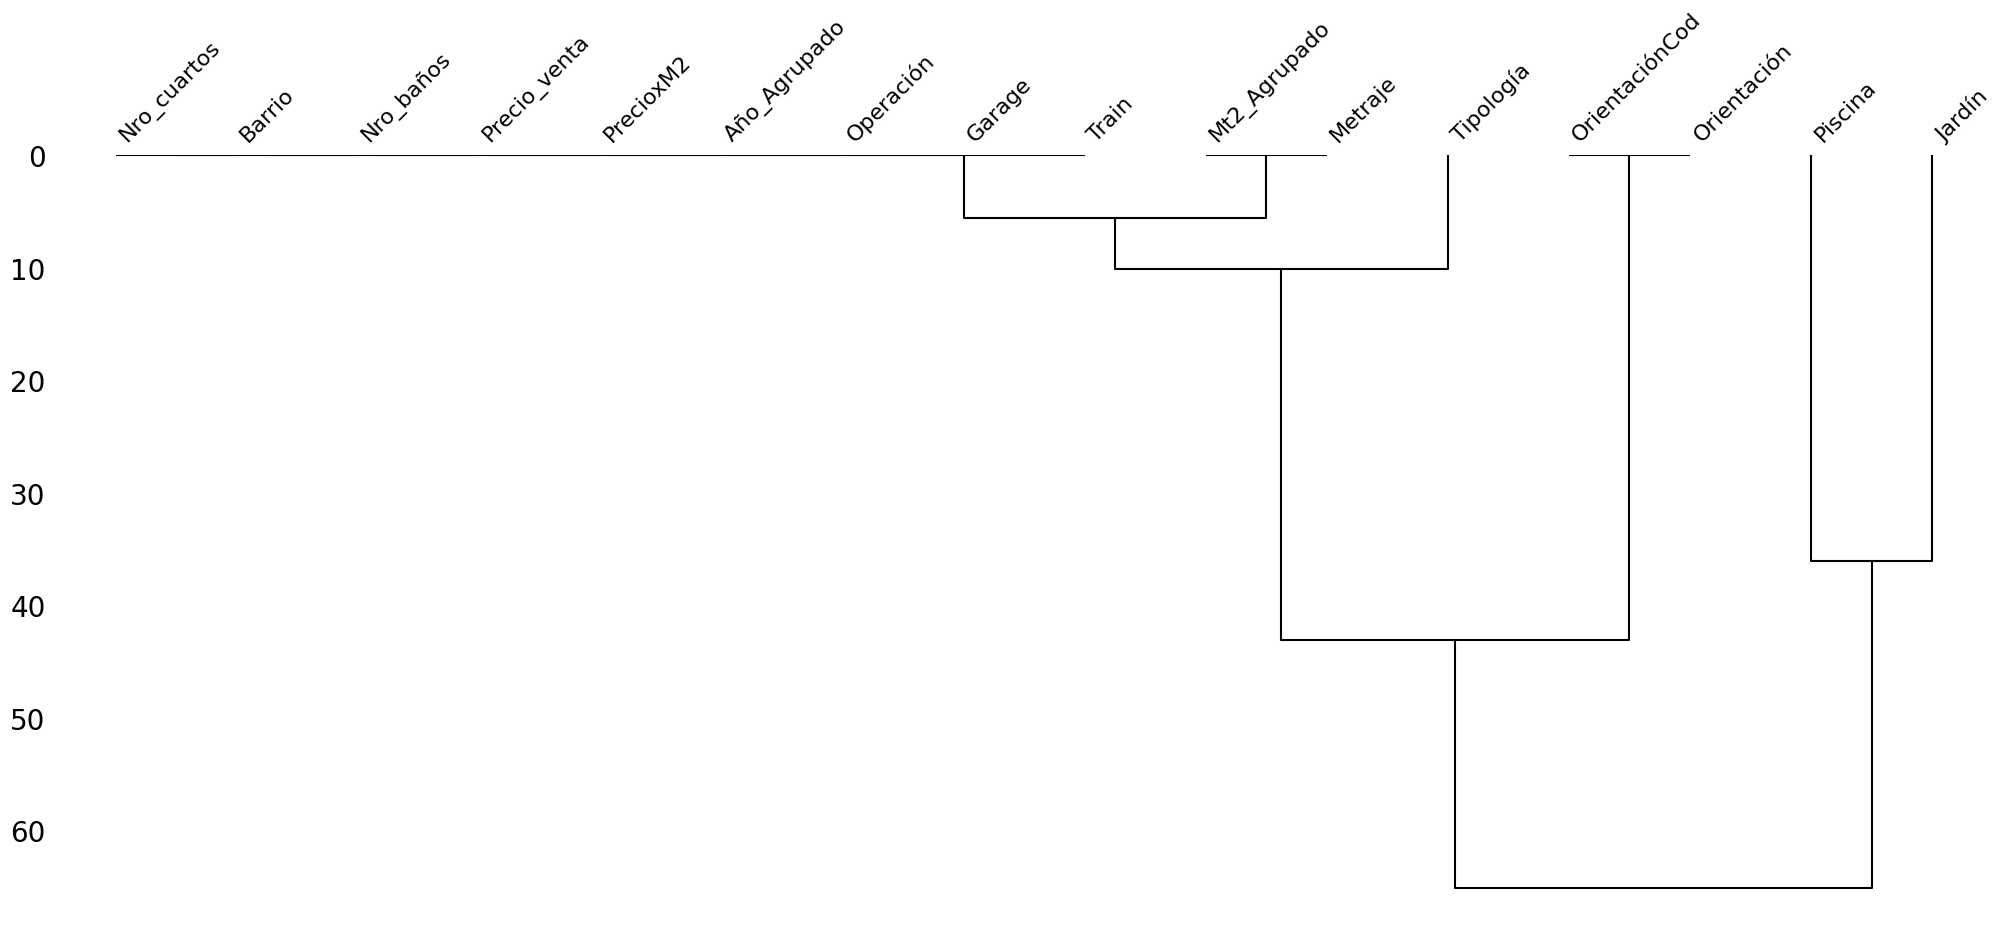

In [32]:
msno.dendrogram(Entrenamiento)

In [33]:
# Al identificar las variables con mayor porcentaje de nulos, interpreto que algunas de estas variables presentan nulos por falta de información al relevar los datos,
# por lo tanto decído reemplazar los nulos por valor 0. Estas variables son Jardín, Piscina y Orientación(OrientacionCod).^
variables1=['Jardín','Piscina','Orientación','OrientaciónCod']
Entrenamiento[variables1]=Entrenamiento[variables1].fillna(0)

<ipython-input-33-df7588f3f2c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Entrenamiento[variables1]=Entrenamiento[variables1].fillna(0)


In [34]:
Entrenamiento.head()

Barrio  Metraje  Nro_cuartos  Nro_baños  Precio_venta  \
0  San Cristóbal, Madrid     64.0            2          1         85000   
2    Los Rosales, Madrid    108.0            2          2        260000   
3     San Andrés, Madrid    126.0            4          2        195000   
4     San Andrés, Madrid     69.0            2          2        118000   
5    Los Rosales, Madrid    123.0            3          2        195000   

   PrecioxM2           Tipología  Año_Agrupado Operación  Jardín  Piscina  \
0       1328  HouseType 1: Pisos          1960     Venta     0.0      0.0   
2       2407  HouseType 1: Pisos          2000     Venta     0.0      1.0   
3       1548  HouseType 1: Pisos          1980     Venta     0.0      0.0   
4       1710  HouseType 1: Pisos          1960     Venta     0.0      0.0   
5       1585  HouseType 1: Pisos          1990     Venta     0.0      0.0   

   Garage Orientación Mt2_Agrupado OrientaciónCod  Train  
0       0       Oeste         <100              1      1  
2       1        Este      100-200              3      1  
3       1        Este      100-200              3      1  
4       0           0         <100              0      1  
5       0        Este      100-200              3      1

In [35]:
#verificación
Entrenamiento.isnull().sum()

Barrio             0
Metraje           31
Nro_cuartos        0
Nro_baños          0
Precio_venta       0
PrecioxM2          0
Tipología         97
Año_Agrupado       0
Operación          0
Jardín             0
Piscina            0
Garage             0
Orientación        0
Mt2_Agrupado      31
OrientaciónCod     0
Train              0
dtype: int64

In [36]:
# Las variables con nulos restantes, decido reemplazar los nulos por la moda.
moda_Metraje = Entrenamiento['Metraje'].mode()[0]
moda_Tipología =Entrenamiento['Tipología'].mode()[0]
moda_Mt2_Agrupado = Entrenamiento['Mt2_Agrupado'].mode()[0]


In [37]:
print(moda_Metraje)
print(moda_Tipología)
print(moda_Mt2_Agrupado)

60.0
HouseType 1: Pisos
<100


In [ ]:
# Reemplazo los valores nulos por la moda en cada columna
Entrenamiento['Metraje']=Entrenamiento['Metraje'].fillna(moda_Metraje)
Entrenamiento['Tipología']=Entrenamiento['Tipología'].fillna(moda_Tipología)
Entrenamiento['Mt2_Agrupado']=Entrenamiento['Mt2_Agrupado'].fillna(moda_Mt2_Agrupado)


In [39]:
#verificación final sin nulos
Entrenamiento.isnull().sum()

Barrio            0
Metraje           0
Nro_cuartos       0
Nro_baños         0
Precio_venta      0
PrecioxM2         0
Tipología         0
Año_Agrupado      0
Operación         0
Jardín            0
Piscina           0
Garage            0
Orientación       0
Mt2_Agrupado      0
OrientaciónCod    0
Train             0
dtype: int64

# **Limpieza de registros duplicados**

In [40]:
#Busco cantidad de filas con datos duplicados en el dataset
Entrenamiento.duplicated().sum()


130

In [41]:
#visualizo algunos registros duplicados
registros_duplicados=Entrenamiento[Entrenamiento.duplicated()]
registros_duplicados.head()

Barrio  Metraje  Nro_cuartos  Nro_baños  \
377      Valdebernardo - Valderribas, Madrid    100.0            2          2   
585  Ensanche de Vallecas - La Gavia, Madrid    189.0            4          2   
623  Ensanche de Vallecas - La Gavia, Madrid     83.0            2          2   
706                            Zofío, Madrid    172.0            4          2   
830                            Usera, Madrid    110.0            3          2   

     Precio_venta  PrecioxM2                   Tipología  Año_Agrupado  \
377        264000       2640          HouseType 1: Pisos          2000   
585        367000       1942  HouseType 2: Casa o chalet          2000   
623        272000       3277          HouseType 1: Pisos          2000   
706        275000       1599         HouseType 5: Áticos          1980   
830        255000       2318          HouseType 1: Pisos          1990   

    Operación  Jardín  Piscina  Garage Orientación Mt2_Agrupado  \
377     Venta     0.0      1.0       1        Este      100-200   
585     Venta     0.0      0.0       1         Sur      100-200   
623     Venta     0.0      1.0       1         Sur         <100   
706     Venta     0.0      0.0       1         Sur      100-200   
830     Venta     0.0      0.0       1         Sur      100-200   

    OrientaciónCod  Train  
377              3      1  
585              4      1  
623              4      1  
706              4      1  
830              4      1

In [42]:
#Elimino registros duplicados
Entrenamiento=Entrenamiento.drop_duplicates(keep=False)



In [43]:
Entrenamiento=Entrenamiento.dropna(subset=Entrenamiento.columns.difference(['index']), how='all')

In [44]:
#Verifico duplicados en el Dset de Entrenamiento
Entrenamiento.duplicated().sum()

0

# **Analisis de valores Atipicos**

**Cortar atípicos al rango de outliers**

In [45]:
numericas_E=['Metraje','Nro_cuartos','Nro_baños','Precio_venta','PrecioxM2','Año_Agrupado','Jardín','Piscina','Garage']

<Axes: >

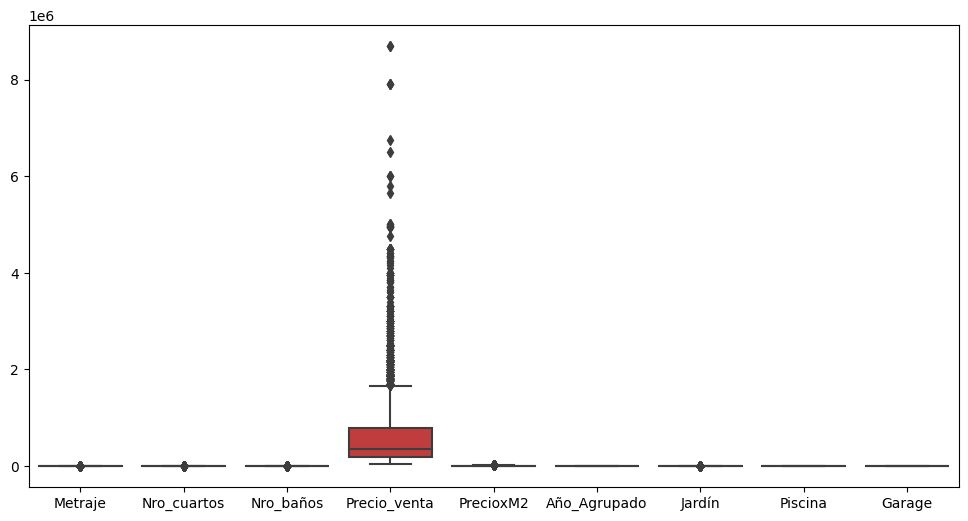

In [46]:
# Grafico de caja y bigote con datos atipicos
plt.figure(figsize=(12,6))
sns.boxplot(data=Entrenamiento[numericas_E])

La mayor parte de atipicos esta en la variable Precio_venta

In [47]:
#identifico cantidad de registros con atipicos
#5323 registros
Entrenamiento.describe()

Metraje  Nro_cuartos    Nro_baños  Precio_venta     PrecioxM2  \
count  5323.000000   5323.00000  5323.000000  5.323000e+03   5323.000000   
mean    158.923915      3.11873     2.182980  6.473592e+05   3618.249296   
std     149.286212      1.49010     1.498952  7.859096e+05   1665.193269   
min      21.000000      0.00000     0.000000  3.600000e+04    706.000000   
25%      72.000000      2.00000     1.000000  1.820000e+05   2362.000000   
50%     101.000000      3.00000     2.000000  3.540000e+05   3333.000000   
75%     175.000000      4.00000     3.000000  7.750000e+05   4474.000000   
max     998.000000     13.00000    11.000000  8.700000e+06  13667.000000   

       Año_Agrupado       Jardín      Piscina       Garage   Train  
count   5323.000000  5323.000000  5323.000000  5323.000000  5323.0  
mean    1977.552132     0.103325     0.303212     0.437723     1.0  
std       18.555524     0.304412     0.459689     0.496153     0.0  
min     1950.000000     0.000000     0.000000     0.000000     1.0  
25%     1960.000000     0.000000     0.000000     0.000000     1.0  
50%     1970.000000     0.000000     0.000000     0.000000     1.0  
75%     2000.000000     0.000000     1.000000     1.000000     1.0  
max     2020.000000     1.000000     1.000000     1.000000     1.0

In [48]:
#defino variables numericas y transformo a tipo interger
numericas_eval_atipicos=['Metraje','Precio_venta','PrecioxM2']
Entrenamiento[numericas_eval_atipicos]=Entrenamiento[numericas_eval_atipicos].astype('int64')

In [49]:
Entrenamiento[numericas_eval_atipicos].describe()

Metraje  Precio_venta     PrecioxM2
count  5323.000000  5.323000e+03   5323.000000
mean    158.923915  6.473592e+05   3618.249296
std     149.286212  7.859096e+05   1665.193269
min      21.000000  3.600000e+04    706.000000
25%      72.000000  1.820000e+05   2362.000000
50%     101.000000  3.540000e+05   3333.000000
75%     175.000000  7.750000e+05   4474.000000
max     998.000000  8.700000e+06  13667.000000

In [50]:
for var in numericas_eval_atipicos:
    Q3 = Entrenamiento[var].quantile(0.75)
    Q1 = Entrenamiento[var].quantile(0.25)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    Entrenamiento = Entrenamiento[(Entrenamiento[var] > lower) & (Entrenamiento[var] < upper)]


In [51]:
#Verificación sin atipicos
Entrenamiento[numericas_eval_atipicos].describe()

Metraje  Precio_venta    PrecioxM2
count  4336.000000  4.336000e+03  4336.000000
mean    105.204797  3.587249e+05  3287.044972
std      52.551863  2.452066e+05  1278.042586
min      21.000000  3.600000e+04   706.000000
25%      69.000000  1.609500e+05  2237.000000
50%      90.000000  2.750000e+05  3112.500000
75%     126.000000  4.900000e+05  4191.000000
max     321.000000  1.170000e+06  7169.000000

In [52]:
#identifico cantidad de registros sin atipicos
#se eliminaron 987 registros
Entrenamiento.describe()

Metraje  Nro_cuartos    Nro_baños  Precio_venta    PrecioxM2  \
count  4336.000000  4336.000000  4336.000000  4.336000e+03  4336.000000   
mean    105.204797     2.719327     1.657057  3.587249e+05  3287.044972   
std      52.551863     1.095384     0.774305  2.452066e+05  1278.042586   
min      21.000000     0.000000     0.000000  3.600000e+04   706.000000   
25%      69.000000     2.000000     1.000000  1.609500e+05  2237.000000   
50%      90.000000     3.000000     2.000000  2.750000e+05  3112.500000   
75%     126.000000     3.000000     2.000000  4.900000e+05  4191.000000   
max     321.000000     8.000000     6.000000  1.170000e+06  7169.000000   

       Año_Agrupado       Jardín      Piscina       Garage   Train  
count   4336.000000  4336.000000  4336.000000  4336.000000  4336.0  
mean    1976.600554     0.017758     0.231780     0.357703     1.0  
std       18.337425     0.132087     0.422018     0.479379     0.0  
min     1950.000000     0.000000     0.000000     0.000000     1.0  
25%     1960.000000     0.000000     0.000000     0.000000     1.0  
50%     1970.000000     0.000000     0.000000     0.000000     1.0  
75%     2000.000000     0.000000     0.000000     1.000000     1.0  
max     2020.000000     1.000000     1.000000     1.000000     1.0

## **Analizo posible correlación entre variables**

In [53]:
#Genero variables numericas
numericas_Entrenamiento=['Metraje','Nro_cuartos','Nro_baños','Precio_venta','PrecioxM2','Año_Agrupado','Jardín','Piscina','Garage']

In [54]:
#Convierto variables booleanas en numéricas
Entrenamiento=Entrenamiento.replace(True,1)
Entrenamiento=Entrenamiento.replace(False,0)


In [55]:
#convierto tipos de datos a interger para variable Jardín y Garage
Entrenamiento[['Jardín','Piscina']]=Entrenamiento[['Jardín','Piscina']].astype('int64')

In [56]:
Entrenamiento.corr()

<ipython-input-56-27f2dacedffb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Entrenamiento.corr()


Metraje  Nro_cuartos  Nro_baños  Precio_venta  PrecioxM2  \
Metraje       1.000000     0.685717   0.810604      0.835266   0.192588   
Nro_cuartos   0.685717     1.000000   0.591452      0.520741  -0.027895   
Nro_baños     0.810604     0.591452   1.000000      0.756422   0.289747   
Precio_venta  0.835266     0.520741   0.756422      1.000000   0.654548   
PrecioxM2     0.192588    -0.027895   0.289747      0.654548   1.000000   
Año_Agrupado  0.083777    -0.224371   0.183830      0.089529   0.138112   
Jardín        0.370417     0.217808   0.323450      0.237607  -0.004429   
Piscina       0.274776     0.040459   0.311078      0.312098   0.235811   
Garage        0.401767     0.157853   0.418810      0.402491   0.239435   
Train              NaN          NaN        NaN           NaN        NaN   

              Año_Agrupado    Jardín   Piscina    Garage  Train  
Metraje           0.083777  0.370417  0.274776  0.401767    NaN  
Nro_cuartos      -0.224371  0.217808  0.040459  0.157853    NaN  
Nro_baños         0.183830  0.323450  0.311078  0.418810    NaN  
Precio_venta      0.089529  0.237607  0.312098  0.402491    NaN  
PrecioxM2         0.138112 -0.004429  0.235811  0.239435    NaN  
Año_Agrupado      1.000000  0.075406  0.499486  0.492362    NaN  
Jardín            0.075406  1.000000  0.066845  0.125530    NaN  
Piscina           0.499486  0.066845  1.000000  0.545620    NaN  
Garage            0.492362  0.125530  0.545620  1.000000    NaN  
Train                  NaN       NaN       NaN       NaN    NaN

<ipython-input-57-04c4b988bf45>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Entrenamiento.corr(), cmap='jet')


<Axes: >

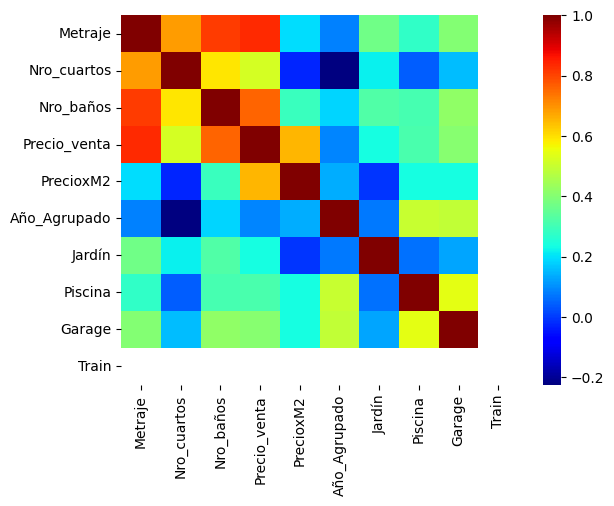

In [57]:
sns.heatmap(Entrenamiento.corr(), cmap='jet')

# **Correlación con Predictive Power Score**

In [ ]:
#instalo librería específica para análisis de correlación de variables ppscore
!pip install ppscore

In [59]:
#Importo librería ppscore
import ppscore as pps
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 500
ppscore1=pps.matrix(Entrenamiento)
ppscore1.loc[ppscore1['y']=='Precio_venta']


x             y   ppscore            case  is_valid_score  \
4            Barrio  Precio_venta  0.392947      regression            True   
20          Metraje  Precio_venta  0.471200      regression            True   
36      Nro_cuartos  Precio_venta  0.171880      regression            True   
52        Nro_baños  Precio_venta  0.374395      regression            True   
68     Precio_venta  Precio_venta  1.000000  predict_itself            True   
84        PrecioxM2  Precio_venta  0.196991      regression            True   
100       Tipología  Precio_venta  0.000000      regression            True   
116    Año_Agrupado  Precio_venta  0.000000      regression            True   
132       Operación  Precio_venta  0.000000      regression            True   
148          Jardín  Precio_venta  0.000000      regression            True   
164         Piscina  Precio_venta  0.016814      regression            True   
180          Garage  Precio_venta  0.059507      regression            True   
196     Orientación  Precio_venta  0.000000   unknown_error           False   
212    Mt2_Agrupado  Precio_venta  0.367412      regression            True   
228  OrientaciónCod  Precio_venta  0.000000   unknown_error           False   
244           Train  Precio_venta  0.000000      regression            True   

                  metric  baseline_score    model_score  \
4    mean absolute error   187236.119234  113662.320537   
20   mean absolute error   187236.119234   99010.452390   
36   mean absolute error   187236.119234  155053.894869   
52   mean absolute error   187236.119234  117135.796007   
68                  None        0.000000       1.000000   
84   mean absolute error   187236.119234  150352.200706   
100  mean absolute error   187236.119234  190146.661642   
116  mean absolute error   187236.119234  195079.608504   
132  mean absolute error   187236.119234  197908.003926   
148  mean absolute error   187236.119234  191015.386200   
164  mean absolute error   187236.119234  184087.864667   
180  mean absolute error   187236.119234  176094.168775   
196                 None        0.000000       0.000000   
212  mean absolute error   187236.119234  118443.330019   
228                 None        0.000000       0.000000   
244  mean absolute error   187236.119234  197908.003926   

                       model  
4    DecisionTreeRegressor()  
20   DecisionTreeRegressor()  
36   DecisionTreeRegressor()  
52   DecisionTreeRegressor()  
68                      None  
84   DecisionTreeRegressor()  
100  DecisionTreeRegressor()  
116  DecisionTreeRegressor()  
132  DecisionTreeRegressor()  
148  DecisionTreeRegressor()  
164  DecisionTreeRegressor()  
180  DecisionTreeRegressor()  
196                     None  
212  DecisionTreeRegressor()  
228                     None  
244  DecisionTreeRegressor()

Con pps utilizando variables independientes no es suficiente para predecir el precio de venta, ya que la correlación es débil en todas las variables

In [60]:
#Importo librería StandarScaler para hacer escalamiento de datos, de modo de poder visualizar mejor el gráfico de caja y bigote
from sklearn.preprocessing import StandardScaler

In [61]:
# Llamo y ejecuto función de escalamiento
scaler = StandardScaler()
df_scaled = scaler.fit(Entrenamiento[numericas_Entrenamiento])
Entrenamiento_escalado=scaler.transform(Entrenamiento[numericas_Entrenamiento])


In [62]:
#Visualizo escalamiento
print(Entrenamiento_escalado)

[[-0.78416914 -0.65676463 -0.84867419 ... -0.13445952 -0.54928244
  -0.74626539]
 [ 0.05319555 -0.65676463  0.4429549  ... -0.13445952  1.82055702
   1.34000587]
 [ 0.39575384  1.16928952  0.4429549  ... -0.13445952 -0.54928244
   1.34000587]
 ...
 [-0.59385899 -0.65676463 -0.84867419 ... -0.13445952  1.82055702
   1.34000587]
 [ 3.07912706  2.0823166   1.73458399 ...  7.43718282  1.82055702
   1.34000587]
 [-0.17517664 -0.65676463  0.4429549  ... -0.13445952  1.82055702
   1.34000587]]


<Axes: >

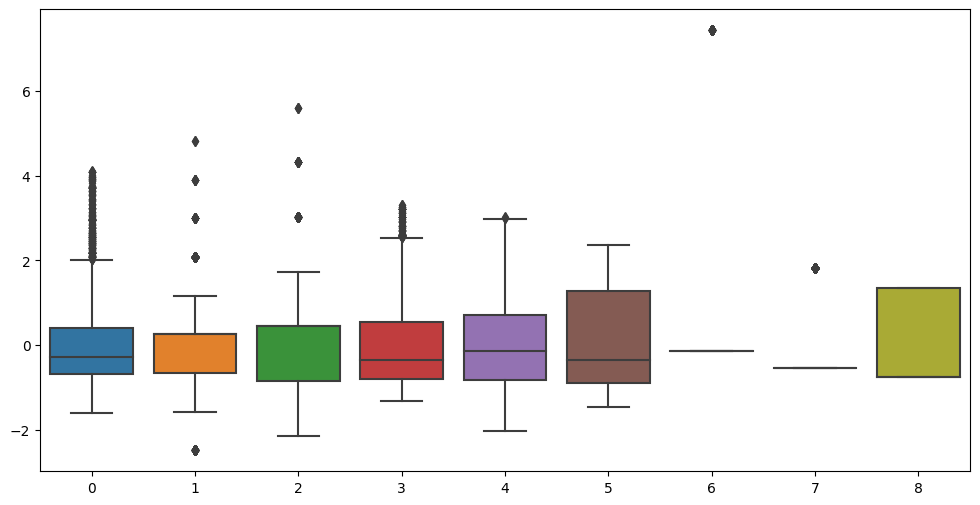

In [63]:
# Grafico de caja y bigote con datos atipicos
plt.figure(figsize=(12,6))
sns.boxplot(data=Entrenamiento_escalado)

<Axes: >

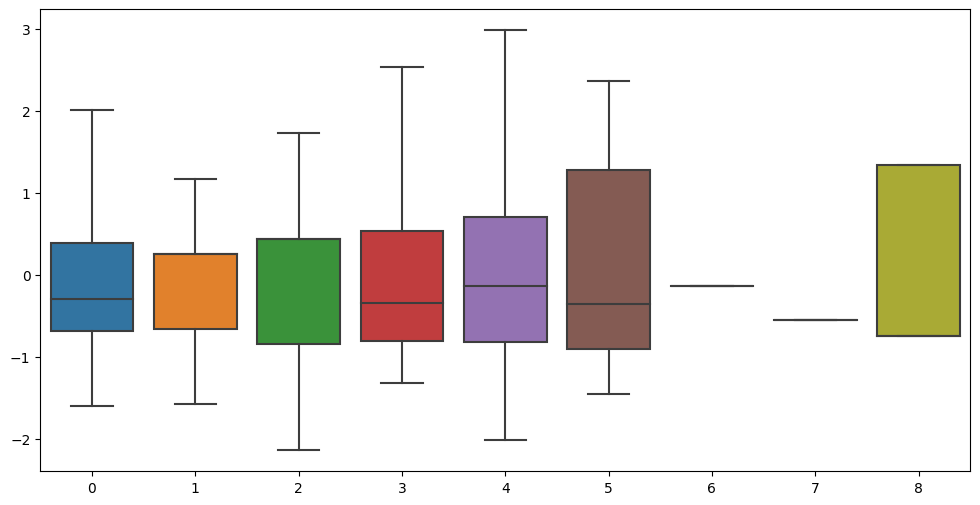

In [64]:
# Sin atipicos
plt.figure(figsize=(12,6))
sns.boxplot(data=Entrenamiento_escalado, showfliers=False)

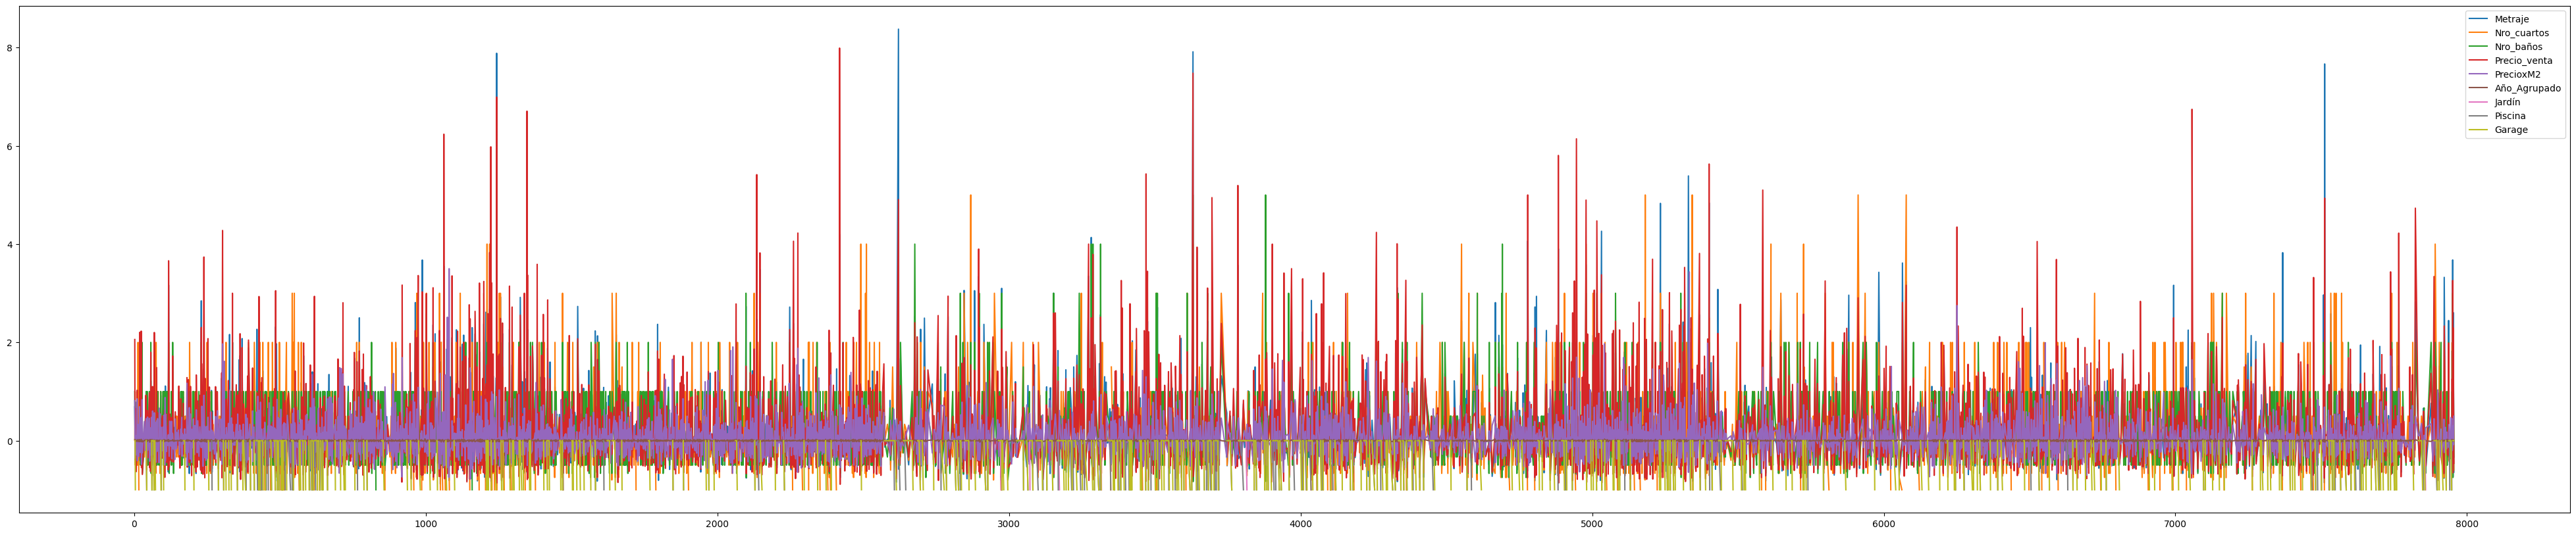

In [65]:
Entrenamiento[numericas_Entrenamiento].pct_change().plot(figsize =(50,10));

Se puede apreciar en el gráfico que las variables que acompañan mayormente el precio de la vivienda es el metraje en primer lugar, el número de baños en segundo lugar, y numero de cuartos en 3er lugar.

# **Análisis EDA con Dataprep**

In [ ]:
#Instalo librería Dataprep
!pip install -U dataprep

In [67]:
#Importo dataprep
from dataprep.eda import create_report

In [104]:
#Creo reporte con Dataprep
create_report(Entrenamiento).show()

Output hidden; open in https://colab.research.google.com to view.

## Interaccion con API


In [ ]:
#importo librería para importar api
import requests

In [ ]:
#Codigo Api Python-Requests
#Devuelve el precio de la gasolina en distintos países del mundo.

url = "https://gas-price.p.rapidapi.com/europeanCountries"

headers = {
	"X-RapidAPI-Key": "eba6a35852mshfb4ef016e3f0c85p10e6f9jsn650ad3e702ce",
	"X-RapidAPI-Host": "gas-price.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

#chequeo de respuesta del requets
response.status_code

#respuesta exitosa Cod

200

In [ ]:
#Visualizo respuesta de API en formato json
print(response.json())

{'results': [{'currency': 'euro', 'lpg': '0,500', 'diesel': '1,769', 'gasoline': '1,797', 'country': 'Albania'}, {'currency': 'euro', 'lpg': '-', 'diesel': '1,378', 'gasoline': '1,473', 'country': 'Andorra'}, {'currency': 'euro', 'lpg': '0,271', 'diesel': '1,108', 'gasoline': '1,155', 'country': 'Armenia'}, {'currency': 'euro', 'lpg': '1,180', 'diesel': '1,585', 'gasoline': '1,606', 'country': 'Austria'}, {'currency': 'euro', 'lpg': '0,406', 'diesel': '0,779', 'gasoline': '0,779', 'country': 'Belarus'}, {'currency': 'euro', 'lpg': '0,602', 'diesel': '1,871', 'gasoline': '1,818', 'country': 'Belgium'}, {'currency': 'euro', 'lpg': '0,643', 'diesel': '1,309', 'gasoline': '1,342', 'country': 'Bosnia and Herzegovina'}, {'currency': 'euro', 'lpg': '0,568', 'diesel': '1,324', 'gasoline': '1,365', 'country': 'Bulgaria'}, {'currency': 'euro', 'lpg': '0,918', 'diesel': '1,465', 'gasoline': '1,467', 'country': 'Croatia'}, {'currency': 'euro', 'lpg': '-', 'diesel': '1,548', 'gasoline': '1,447', 'c

In [ ]:
#Importo librería json para trabajar con respuesta de API en este formato
import json

In [ ]:
#Cargo la respuesta de API con la librería json
list_gas = json.loads(response.text)

In [ ]:
#Visualizo las claves resultantes de la API
list_gas.keys()

dict_keys(['results', 'success'])

In [ ]:
#visualizo primera variable
list_gas['results']

[{'currency': 'euro',
  'lpg': '0,500',
  'diesel': '1,769',
  'gasoline': '1,797',
  'country': 'Albania'},
 {'currency': 'euro',
  'lpg': '-',
  'diesel': '1,378',
  'gasoline': '1,473',
  'country': 'Andorra'},
 {'currency': 'euro',
  'lpg': '0,271',
  'diesel': '1,108',
  'gasoline': '1,155',
  'country': 'Armenia'},
 {'currency': 'euro',
  'lpg': '1,180',
  'diesel': '1,585',
  'gasoline': '1,606',
  'country': 'Austria'},
 {'currency': 'euro',
  'lpg': '0,406',
  'diesel': '0,779',
  'gasoline': '0,779',
  'country': 'Belarus'},
 {'currency': 'euro',
  'lpg': '0,602',
  'diesel': '1,871',
  'gasoline': '1,818',
  'country': 'Belgium'},
 {'currency': 'euro',
  'lpg': '0,643',
  'diesel': '1,309',
  'gasoline': '1,342',
  'country': 'Bosnia and Herzegovina'},
 {'currency': 'euro',
  'lpg': '0,568',
  'diesel': '1,324',
  'gasoline': '1,365',
  'country': 'Bulgaria'},
 {'currency': 'euro',
  'lpg': '0,918',
  'diesel': '1,465',
  'gasoline': '1,467',
  'country': 'Croatia'},
 {'curr

**La variable "results" contiene la información anidada**

In [ ]:
#Visualizo la otra variable
list_gas['success']

True

**La variable "success" solamente muestra un estado de invocación luego de la llamada**

In [ ]:
#genero variable para desagregar las variables anidadas
var=list_gas['results']

In [ ]:
#Convierto los datos en un Dataframe de Pandas
Dataframe_gas = pd.DataFrame.from_dict(var)

In [ ]:
#Visualizo el Dataframe
Dataframe_gas

currency    lpg diesel gasoline                 country
0      euro  0,500  1,769    1,797                 Albania
1      euro      -  1,378    1,473                 Andorra
2      euro  0,271  1,108    1,155                 Armenia
3      euro  1,180  1,585    1,606                 Austria
4      euro  0,406  0,779    0,779                 Belarus
5      euro  0,602  1,871    1,818                 Belgium
6      euro  0,643  1,309    1,342  Bosnia and Herzegovina
7      euro  0,568  1,324    1,365                Bulgaria
8      euro  0,918  1,465    1,467                 Croatia
9      euro      -  1,548    1,447                  Cyprus
10     euro  0,653  1,444    1,567          Czech Republic
11     euro      -  1,757    1,958                 Denmark
12     euro  0,736  1,612    1,727                 Estonia
13     euro      -  1,875    1,898                 Finland
14     euro  0,992  1,781    1,886                  France
15     euro  0,647  1,330    1,024                 Georgia
16     euro  1,057  1,774    1,869                 Germany
17     euro  0,926  1,685    1,924                  Greece
18     euro  0,903  1,587    1,591                 Hungary
19     euro      -  2,097    2,072                 Iceland
20     euro  0,890  1,589    1,613                 Ireland
21     euro  0,778  1,798    1,886                   Italy
22     euro      -  0,000    0,000                  Kosovo
23     euro  0,744  1,566    1,636                  Latvia
24     euro  0,563  1,515    1,520               Lithuania
25     euro  0,722  1,573    1,601              Luxembourg
26     euro  0,818  1,289    1,313         North Macedonia
27     euro      -  1,211    1,341                   Malta
28     euro  0,757  1,109    1,276                 Moldova
29     euro  0,850  1,480    1,550              Montenegro
30     euro  0,916  1,740    1,983             Netherlands
31     euro  1,260  1,885    2,062                  Norway
32     euro  0,651  1,463    1,436                  Poland
33     euro  0,862  1,612    1,767                Portugal
34     euro  0,689  1,433    1,359                 Romania
35     euro  0,247  0,658    0,589                  Russia
36     euro  0,847  1,625    1,505                  Serbia
37     euro  0,738  1,513    1,577                Slovakia
38     euro  0,894  1,523    1,433                Slovenia
39     euro  0,954  1,548    1,641                   Spain
40     euro  1,100  2,055    1,795                  Sweden
41     euro  1,053  2,040    1,892             Switzerland
42     euro  0,536  1,134    1,122                  Turkey
43     euro      -  0,000    0,000                   U.S.A
44     euro  0,596  1,231    1,210                 Ukraine
45     euro  0,888  1,930    1,687          United Kingdom

In [ ]:
#Filtro el precio del gas en España
Precio_gas_España=Dataframe_gas['country']=='Spain'
Pgas_España=Dataframe_gas[Precio_gas_España]

In [ ]:
#Visualizo el precio de la gasolina en España
Pgas_España

currency    lpg diesel gasoline country
39     euro  0,954  1,548    1,641   Spain

#**STORY TELLING**


En un bullicioso distrito de Madrid, una renombrada cadena inmobiliaria se enfrentaba a un dilema común pero desafiante en su búsqueda por brindar un servicio excepcional a sus clientes. Los dueños de viviendas, impulsados por emociones y recuerdos arraigados, a menudo sobrevaloraban el precio de sus propiedades al momento de venderlas. Esto conducía a una especulación inmobiliaria que dificultaba la transparencia y la equidad en el mercado.

En medio de este panorama, la cadena inmobiliaria se propuso revolucionar la forma en que tasaban las propiedades en venta. Su objetivo era claro: crear una herramienta de predicción que pudiera estimar con precisión el valor de venta de las viviendas, permitiendo a los clientes obtener una visión realista del mercado y facilitando transacciones más justas.

La necesidad de una herramienta como esta se volvía aún más evidente al observar la variación de inmuebles en venta por década. Para visualizar cómo el mercado fluctuaba a lo largo del tiempo, presentamos un gráfico que muestra la cantidad de registros por año, agrupados en décadas.

Este gráfico revela cómo la cantidad de inmuebles disponibles para la venta ha evolucionado y cómo esta variación influye en la cantidad de tasaciones que los agentes inmobiliarios deben realizar. A medida que los ciclos de ventas y las demandas del mercado cambiaban, el trabajo de tasación se volvía más complejo.

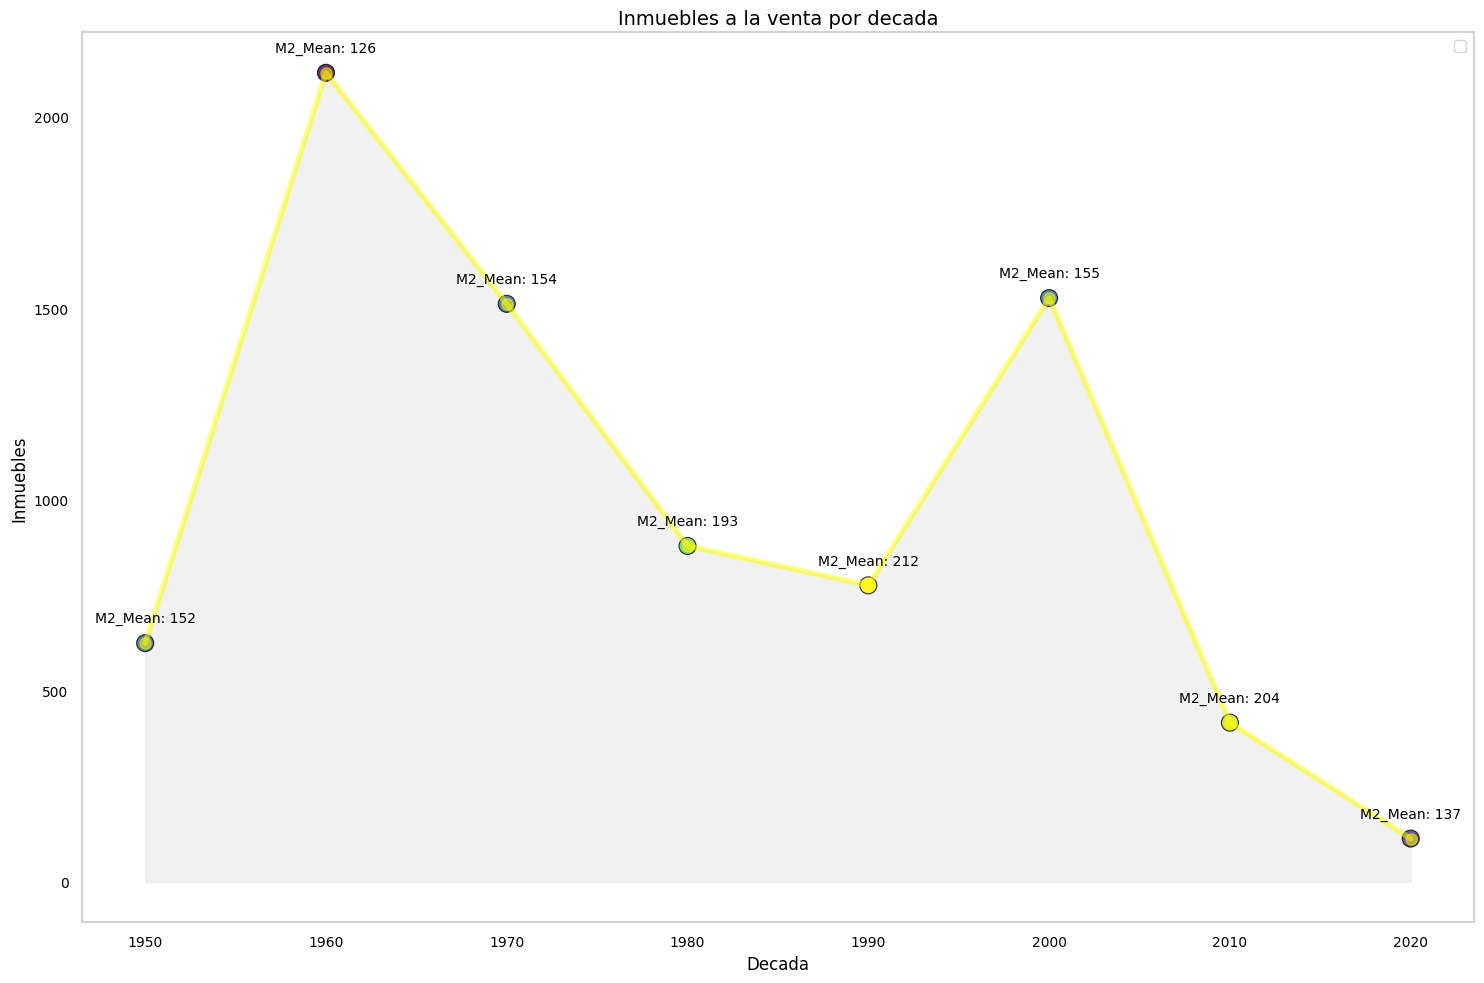

In [111]:
# Contar la cantidad de registros por año
registros_por_año = Dset_Madrid.groupby('Año_Agrupado').size()
# Contar la cantidad de registros por año
registros_por_año = Dset_Madrid.groupby('Año_Agrupado').size()

# Calcular las medias de la variable 'nro_dormitorios' por año
medias_dormitorios = Dset_Madrid.groupby('Año_Agrupado')['Metraje'].mean()

# Crear un gráfico de líneas limpio y visualmente atractivo
plt.figure(figsize=(15, 10))

# Gráfico de líneas con transparencia y sombreado
plt.fill_between(registros_por_año.index, registros_por_año, color='lightgray', alpha=0.3)
plt.plot(registros_por_año, marker='o', color='Yellow', linewidth=4, markersize=8, alpha=0.5)

# Scatter plot con colores resaltados
plt.scatter(registros_por_año.index, registros_por_año, c=medias_dormitorios, cmap='viridis', s=150, edgecolors='black', linewidths=0.8, alpha=0.8)
import math
# Etiquetas con medias de nro_dormitorios
for year, media in medias_dormitorios.iteritems():
    rounded_media = math.ceil(media)
    plt.annotate(f'M2_Mean: {rounded_media}', (year, registros_por_año[year]), textcoords="offset points", xytext=(0, 15), ha='center', fontsize=10, color='black')

plt.xlabel('Decada', fontsize=12,color='black')
plt.ylabel('Inmuebles', fontsize=12,color='black')
plt.title('Inmuebles a la venta por decada', fontsize=14,color='black')
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=10,color='black')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.savefig('Ventas_decadas.png', format='png', transparent=True)
plt.show()

Así nació la ambiciosa herramienta de predicción. Esta herramienta, basada en un algoritmo de regresión, tomaba en consideración una variedad de variables: ubicación, tamaño, antigüedad, comodidades cercanas y más. Con estas variables, la herramienta generaba proyecciones de precios para los inmuebles en etapas tempranas, lo que permitía a la inmobiliaria presentar informes precisos a los dueños de las viviendas.

La herramienta de predicción no solo abordó la especulación inmobiliaria, sino que también alivió significativamente la carga de trabajo de los agentes inmobiliarios. Ahora, con estimaciones precisas basadas en datos, el proceso de tasación se volvió más eficiente y efectivo. Esta historia es un testimonio de cómo la tecnología no solo transforma los números, sino también la dinámica entre los profesionales y sus clientes, aliviando la incertidumbre y fomentando un mercado inmobiliario más transparente y equitativo en el corazón de España.

# **Data Profiling**

In [ ]:
# Instalo data profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [71]:
#importo pandas profiling
import pandas_profiling

In [72]:
#Data Profiling
profile = pandas_profiling.ProfileReport(Entrenamiento)
profile

Output hidden; open in https://colab.research.google.com to view.

# **Analisis Bivarido**

<Axes: xlabel='Metraje', ylabel='Precio_venta'>

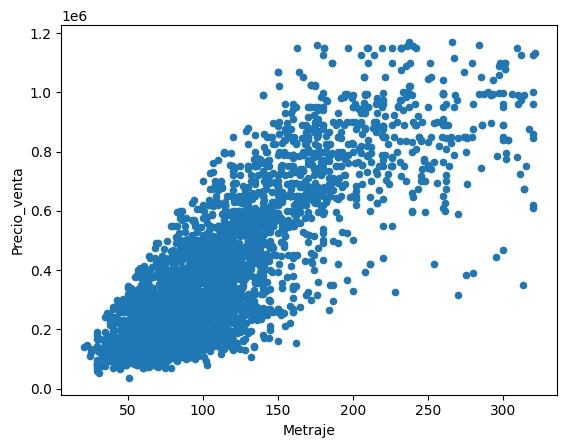

In [73]:
#variable numérica vs numérica
Entrenamiento.plot.scatter(x='Metraje', y='Precio_venta')

*Se puede observar una correlación fuerte entre las variables precio_venta y metraje. Son variables directamente proporcionales, ya que cuanto mayor es el valor del metraje, mayor es el valor del precio_venta*

<Axes: xlabel='Metraje', ylabel='Nro_baños'>

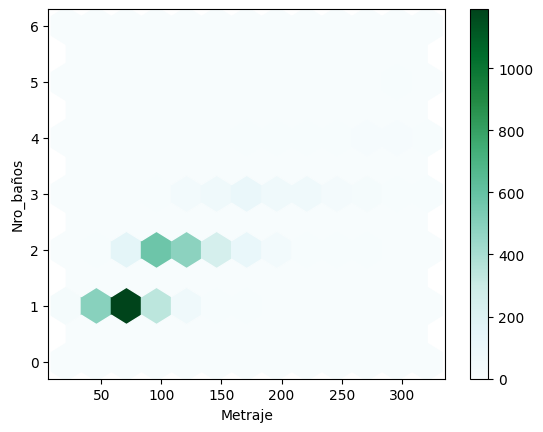

In [74]:
#variable numérica vs numérica
Entrenamiento.plot.hexbin(x='Metraje', y='Nro_baños', gridsize=12)

En esta otra gráfica, al analizar el metraje vs el nro de baños, se presenta otra correlación fuerte, ya que para viviendas con menos de 75 mt2, presentan 1 solo baño, en cambio las viviendas entre 100 y 150 mts2 presentan normalmente 2 baños. Luego, 3 o más baños se aprecia levemente para viviendas entre 150 y 200 mts2.

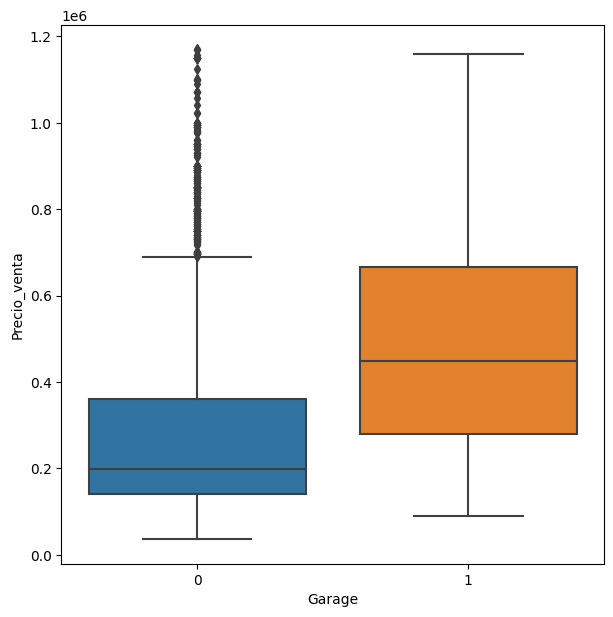

In [75]:
##variable numérica vs categórica
#Boxplot
plt.figure(figsize=(7,7)) #defino el tamaño del grafico
sns.boxplot(y = 'Precio_venta', x = 'Garage', data = Entrenamiento)
plt.show()

Al analizar la variable númerica Precio_venta vs variable categórica Garage(cuenta con él), podemos deducir que estas variables no tienen una correlación fuerte, ya que la mayor proporción de los datos de viviendas con garage se ubica entre los 300k y los 700k, con una media en los 400k, en cambio, las viviendas sin garage presentan los datos gruesos entre los 180k y los 390k, con una media en los 200k. Existe un desfasaje en el grueso de los datos de ambas variables, aunq en algunos casos se superponen las cajas.

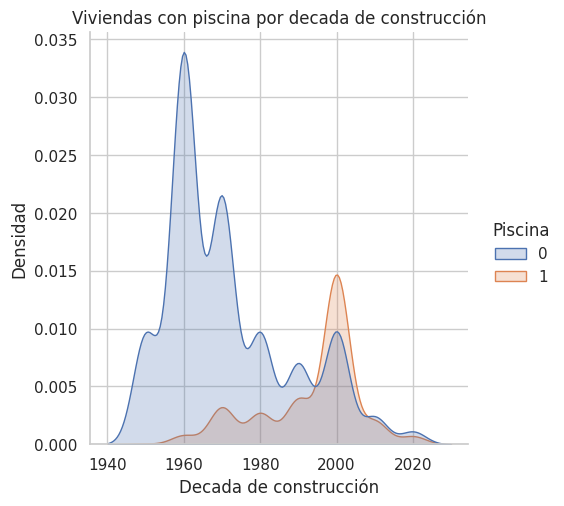

In [76]:
##variable numérica vs categórica
# Crear un gráfico de distribución
sns.set(style="whitegrid")
g = sns.displot(data=Entrenamiento, x='Año_Agrupado', hue='Piscina', kind='kde', fill=True)

# Establecer etiquetas y título
g.set(xlabel='Decada de construcción', ylabel='Densidad', title='Viviendas con piscina por decada de construcción')

*Al analizar las variables decada de construcción vs viviendas con piscina se puede observar que existe un desfasaje entre ambas variables desde 1940 hasta la decada del 1990,  en donde a partir de aquí sí se correlacionan amabas variables. Por tal motivo, ambas variables tienen una correlación fuerte parcialmente, pero una correlación débil si evaluamos ambas variables a nivel general.*

<Figure size 1000x1000 with 0 Axes>

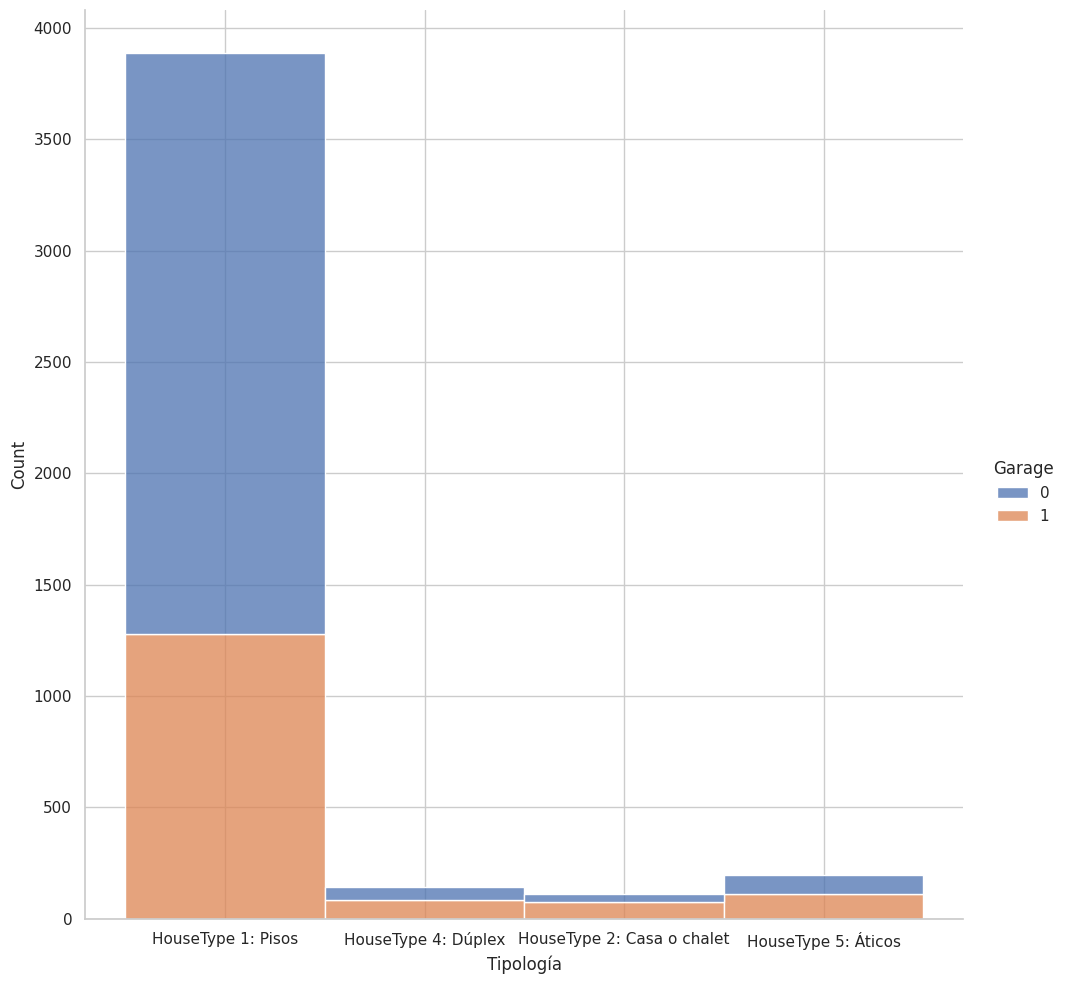

In [77]:
#Variable categórica vs categórica
plt.figure(figsize=(10,10)) #defino el tamaño del grafico
sns.displot(data=Entrenamiento, x="Tipología", hue="Garage", multiple="stack", height=10)

*Al observar el siguiente gráfico a nivel general, en donde analizamos la correlación entre 2 variables categóricas Tipología vs Garage podemos interpretar que la proporción de viviendas con o sin garage se reparte casi uniformemente para todas las tipologías, por lo cual podemos afirmar que las viviendas que presentan la comodidad de garage no están relacionadas a una tipología específica.
Aunque, si miramos más en detalle se ven pequeñas diferencias en las proporciones para la tipología pisos(monoambiente) en el cual predominan las viviendas sin garage, dado que presentan menores metrajes edificados; o por el contrario, la tipología casas o chalet, el cual significa mayor metraje construido, se aprecia una leve mayoría de viviendas construidas con garages.*

# **Análisis multivariado**

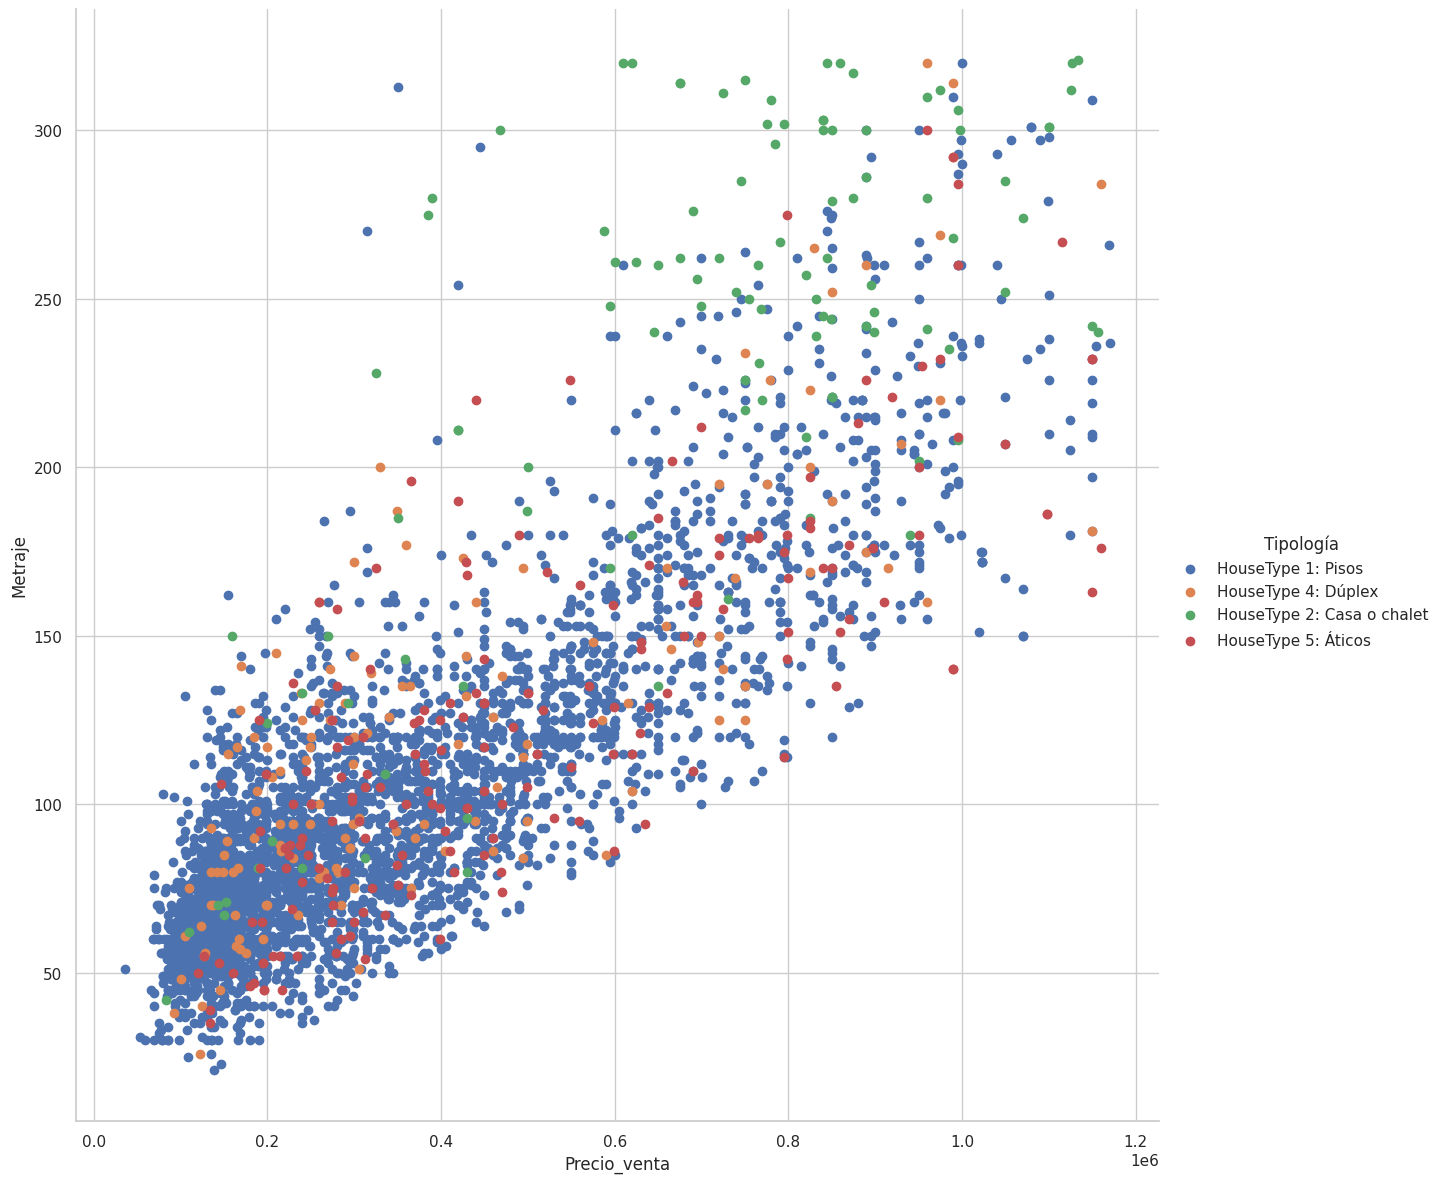

In [78]:
# variable numérica vs numérica vs categórica
g = sns.FacetGrid(Entrenamiento, hue='Tipología', height=12)
g.map(plt.scatter, 'Precio_venta', 'Metraje')
g.add_legend()
plt.show()

*Al analizar el gráfico relacionando Precio_venta vs Metraje y marca de color tipología se aprecia una gran mancha uniforme en la marca de color por lo cual interpreto que no existe una correlación directa entre las variables.*

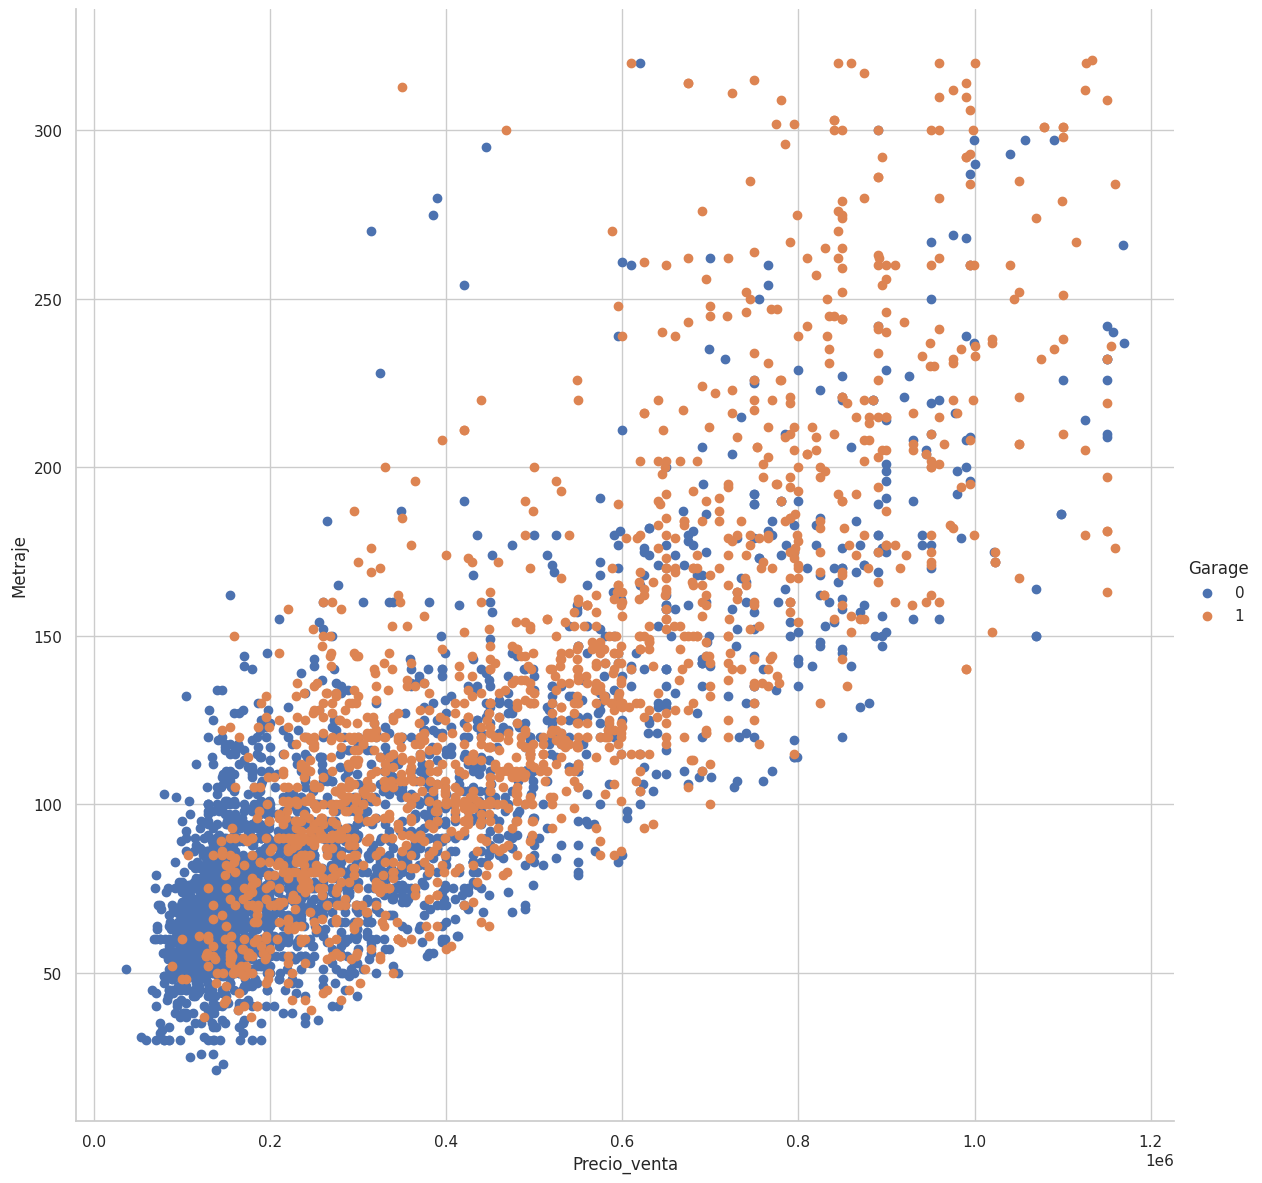

In [79]:
# variable numérica vs numérica vs categórica
g = sns.FacetGrid(Entrenamiento, hue='Garage', height=12)
g.map(plt.scatter, 'Precio_venta', 'Metraje')
g.add_legend()
plt.show()

En este otro análisis, si cambiamos la variable categórica "Tipología" por "Garage" podemos observar que existe un limite en 100 k en donde viviendas que cuestan menos de 100k y tienen menos de 100 mt2 no presentan garage, y en caso contrario, mayores a 100k y con mayor metraje que 100 mt2 se visualiza una mancha uniforme de viviendas con presencia de garage.

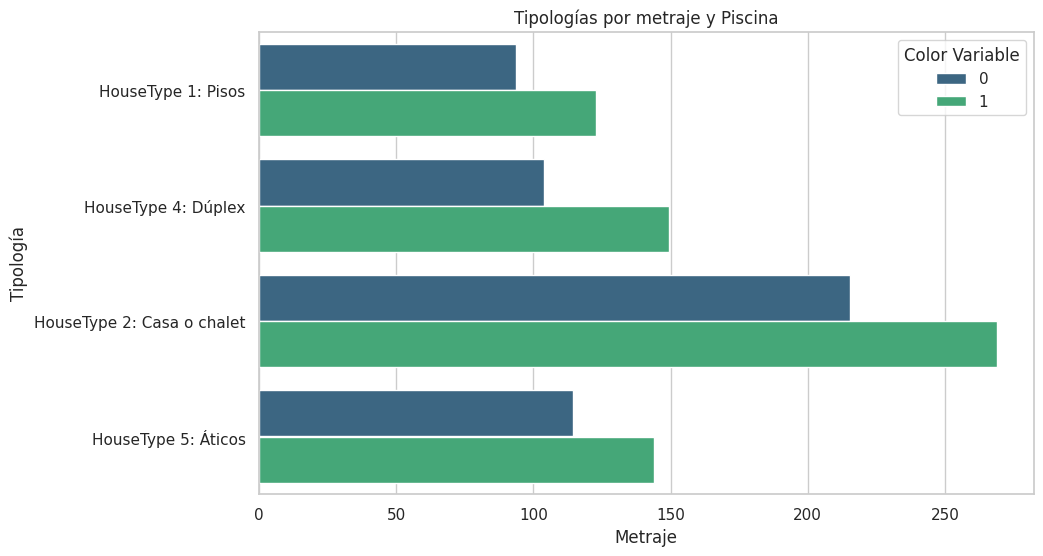

In [80]:
# variable numérica vs categórica vs categórica

plt.figure(figsize=(10, 6))  # Define el tamaño del gráfico

sns.barplot(data=Entrenamiento, x="Metraje", y='Tipología', hue="Piscina", palette="viridis", ci=None)

plt.xlabel("Metraje")
plt.ylabel("Tipología")
plt.title("Tipologías por metraje y Piscina")
plt.legend(title="Color Variable", loc="upper right")

plt.show()





*Se puede interpretar en la gráfica que para las tipologías 1,3 y 4(monoambiente, dupliex y atícos) las viviendas sin piscina tienen hasta 100mt2 construídos, en cambio para la tipología 2 - casa o chalet, las viviendas sin piscina llegan hasta los 200mt2 construidos.Esto se puede explicar ya que los lotes para las tipologías de casas son mayores.*

# **Analisis del Dataset pairplot con marca de color viviendas con o sin garage**

<Figure size 768x576 with 0 Axes>

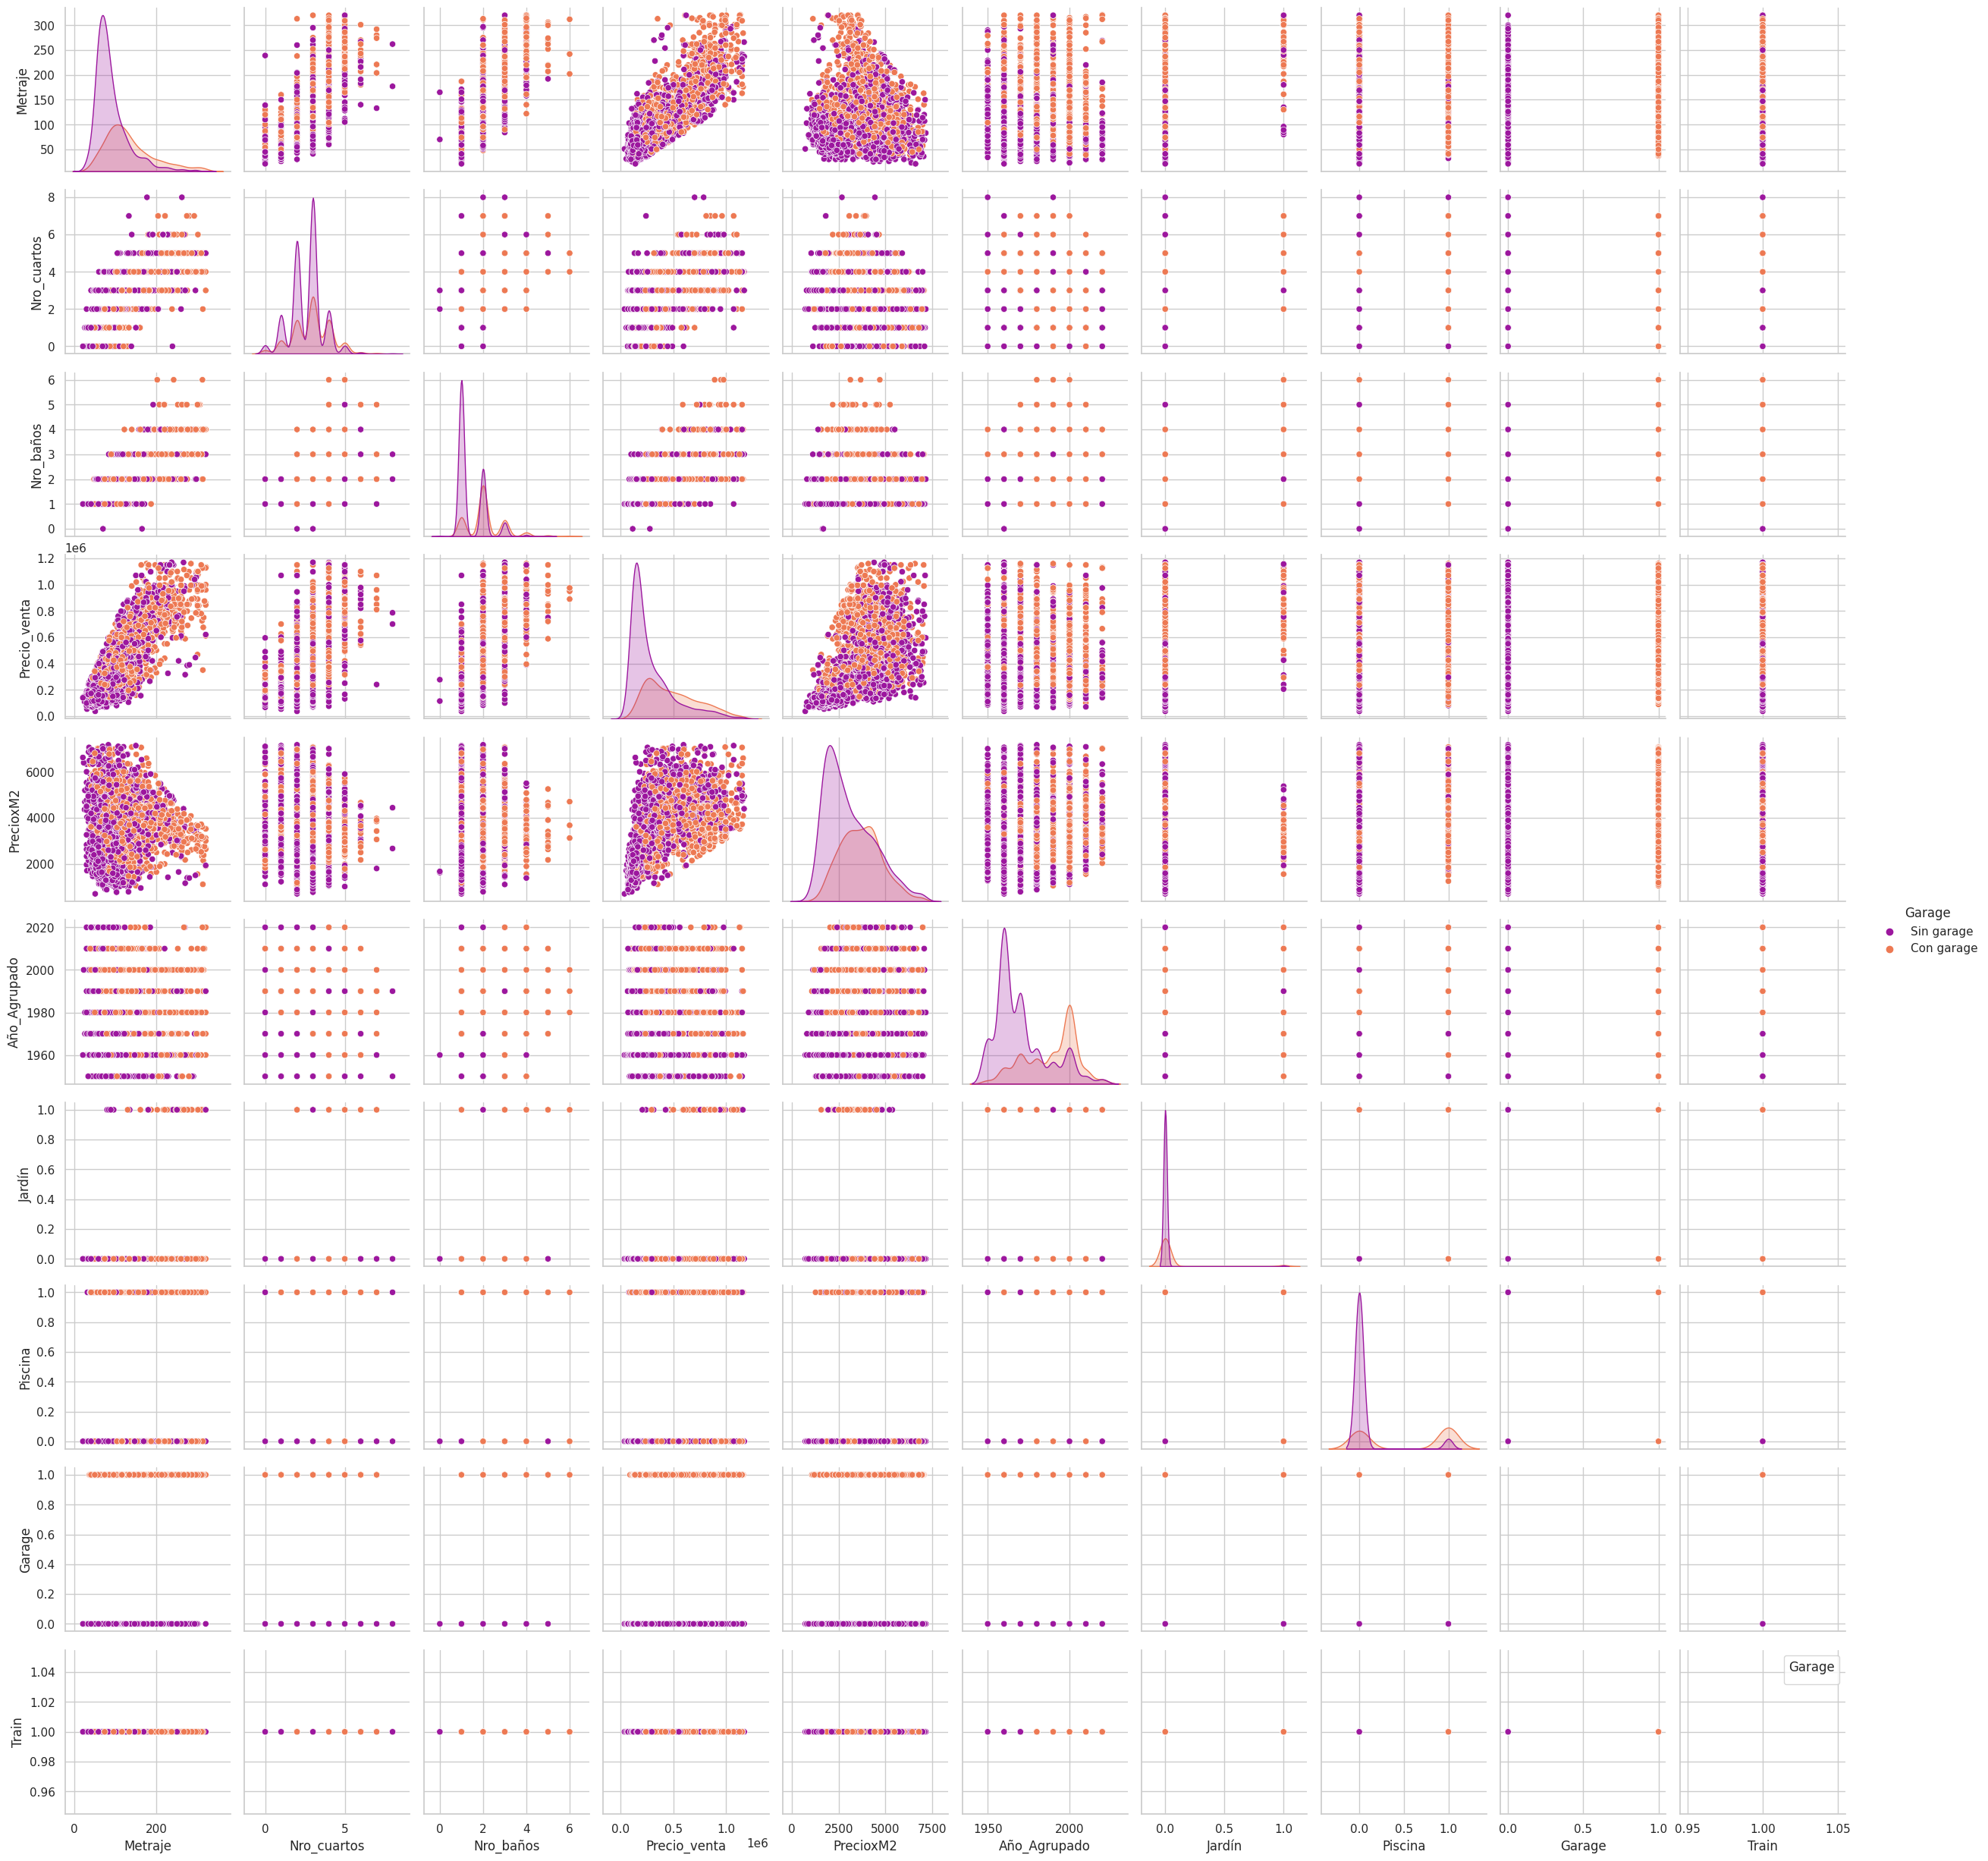

In [81]:
# Define un diccionario de mapeo para las etiquetas personalizadas
label_mapping = {0: 'Sin garage', 1: 'Con garage'}

# Aplica el diccionario de mapeo a la columna 'Garage'
Entrenamiento['Garagemap'] = Entrenamiento['Garage'].map(label_mapping)

plt.figure(dpi=120)
pairplot = sns.pairplot(Entrenamiento, hue='Garagemap', palette='plasma')
pairplot._legend.set_title('Garage')

# Utiliza plt.legend para personalizar las etiquetas
plt.legend(title='Garage', labels=['Sin garage', 'Con garage'])

plt.show()




# **Método de Selección de Variables**






In [ ]:
#instalo librería para selección de variables
!pip install mlxtend


In [83]:
#Importo librería mlxtend
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

**SFS HACIA ATRAS**

In [84]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=4,
          forward=False,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [85]:
#Defino variable objetivo y variables predictoras
vobjetivo=Entrenamiento['Precio_venta']
vpredictoras=Entrenamiento.drop(['Precio_venta','Barrio','Tipología','Operación','Mt2_Agrupado','Orientación','Garagemap'],  axis=1)

In [86]:
#Visualizo variables para verificar el correcto formato de datos
vpredictoras

Metraje  Nro_cuartos  Nro_baños  PrecioxM2  Año_Agrupado  Jardín  \
0          64            2          1       1328          1960       0   
2         108            2          2       2407          2000       0   
3         126            4          2       1548          1980       0   
4          69            2          2       1710          1960       0   
5         123            3          2       1585          1990       0   
...       ...          ...        ...        ...           ...     ...   
7950       59            3          1       2746          1960       0   
7951      276            4          4       2500          2000       1   
7952       74            2          1       3236          1980       0   
7953      267            5          3       2959          2020       1   
7955       96            2          2       4427          2000       0   

      Piscina  Garage OrientaciónCod  Train  
0           0       0              1      1  
2           1       1              3      1  
3           0       1              3      1  
4           0       0              0      1  
5           0       0              3      1  
...       ...     ...            ...    ...  
7950        0       0              0      1  
7951        1       1              0      1  
7952        1       1              0      1  
7953        1       1              3      1  
7955        1       1              3      1  

[4336 rows x 10 columns]

In [87]:
#Formateo datos flotantes a interger
vpredictoras.astype('int64')

Metraje  Nro_cuartos  Nro_baños  PrecioxM2  Año_Agrupado  Jardín  \
0          64            2          1       1328          1960       0   
2         108            2          2       2407          2000       0   
3         126            4          2       1548          1980       0   
4          69            2          2       1710          1960       0   
5         123            3          2       1585          1990       0   
...       ...          ...        ...        ...           ...     ...   
7950       59            3          1       2746          1960       0   
7951      276            4          4       2500          2000       1   
7952       74            2          1       3236          1980       0   
7953      267            5          3       2959          2020       1   
7955       96            2          2       4427          2000       0   

      Piscina  Garage  OrientaciónCod  Train  
0           0       0               1      1  
2           1       1               3      1  
3           0       1               3      1  
4           0       0               0      1  
5           0       0               3      1  
...       ...     ...             ...    ...  
7950        0       0               0      1  
7951        1       1               0      1  
7952        1       1               0      1  
7953        1       1               3      1  
7955        1       1               3      1  

[4336 rows x 10 columns]

In [88]:
#Entrenamiento de selección de variables hacia adelante
sfs.fit(vpredictoras, vobjetivo)
#Resultado selección de variables hacia adelante
sfs.k_feature_names_

('Metraje', 'PrecioxM2', 'Año_Agrupado', 'Jardín')

**SFS HACIA ADELANTE**

In [89]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [90]:
#Entrenamiento de selección de variables hacia atras
sfs.fit(vpredictoras, vobjetivo)
#Resultado de selección de variables hacia atras
sfs.k_feature_names_

('Metraje', 'Nro_baños', 'PrecioxM2', 'Año_Agrupado', 'Jardín')

**Aplicación de Algoritmo**

In [91]:
#Defino variables predictoras y objetivo
X=Entrenamiento[['Metraje', 'Nro_baños', 'PrecioxM2', 'Año_Agrupado']]
y=Entrenamiento['Precio_venta']

In [92]:
# descargo el algoritmo bosque aleatorio para regresión y las métricas para evaluación de resultados
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Divido datos de entrenamiento y prueba**

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Genero el modelo Random Forest Regression**

In [94]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

**Entreno el modelo**

In [95]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Hacer predicciones en el conjunto de prueba**

In [96]:
y_pred = rf_reg.predict(X_test)

**Calculo el error cuadrático medio (MSE)**

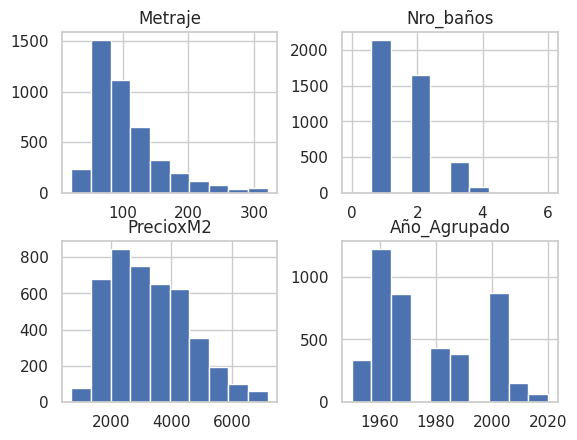

In [97]:
X.hist()
plt.show()

#**Conclusiones**
El dataset de estudio inicialmente presenta 20 mil registros. Luego este volumen se va reduciendo y filtrando por algunos atipicos visibles, casos que no corresponden (inmuebles en alquiler), años de consutrucción muy lejanos en el tiempo, etc; El juego de datos se reduce a la mitad.
También se trabaja realizando nuevas series con nuevos datos, de modo de poder trabajar de mejor manera con los algoritmos, por ejemplo, agrupación de año de construcción, clasificación de asoleamiento con clave de código, se pasan acodigo booleanas de comodidades(piscina,garage,jardín)
Se reemplazan NaN por 0.

Luego de realizar todo este tratamiento, y pasar a la selección de variables, se introdujeron en el algoritmo predictor, el cual se entrenó, testeo y evaluó.

Se seleccióna un modelo de Forest Regresión como input inicial dado que presenta buen desempeño para dataset con datos sucios, a pesar de ya haber realizado una limpieza inicial.

La evaluación del modelo MSE da un valor sumamente alto, lo cual interpeto que puede deberse a que muchas de estas variables estan cesgadas hacia los estremos, o también se presentan muchos registros con valores en cero.

Relizar esta limpieza implicará una pérdida de volumen de datos, por lo cual será necesario evaluar quitar un % de atipicos adecuado de forma de obtener mejores resultados.
También será necesario evaluar otros modelos para determinar cual es el algoritmo más certero, o si en caso contrario ninguno logra una predicción optima.


In [ ]:
y_test

In [ ]:
y_pred

**Diferentes Métricas de evaluación del modelo**

In [100]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 59567175.474650614


In [101]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9989576051277406


In [102]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 3654.971589601163


# **Analisis gráfico**

<Axes: xlabel='Precio_venta'>

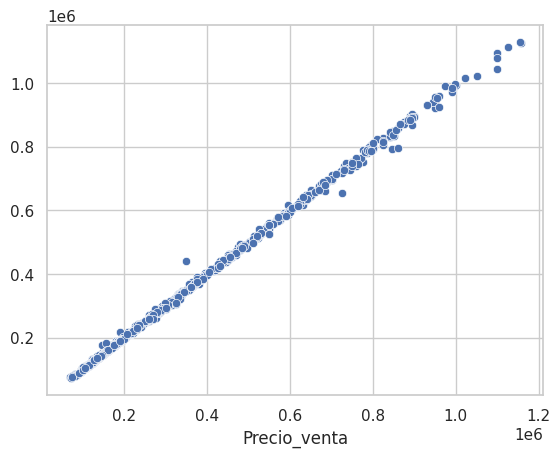

In [103]:
sns.scatterplot(x=y_test,y=y_pred)

#**Evaluanto_modelos_de_ML**

El algoritmo elegido para comenzar con esta predicción fue el bosque aleatorio de regresión por el motivo de que funciona muy bien con datasets crudos (sin limpieza)
También podría haber sido el arbol de desición ya que tampoco tiene requisitos especiales de entrada, aunque tiene poco poder con la ventaja de una fácil interpretación.
Otra posibilidad hubiese sido usar la librería de auto maching learning TPOTclassifier en la cual se le pasa el dataset y sugiere los mejores algoritmos posibles para predecir la variable objetivo.

Dado el objetivo de predecir el precio de las viviendas, entiendo que el modelo inicial seleccionado (bosque aleatorio) es adecuado, ya que presenta un r2 de 0.92 casí perfecto y por otro lado el MAE da como resultado $32.000 de diferencia en comparación con la realidad testeada. Es un valor aceptable.
De modo contrario el MSE resulta extremadamente alto, algo que no es bueno, pero sabiendo que estamos en una etapa inicial, en donde no hemos trabajado mucho en depuración de datos, existiendo muchos atipicos o valores en cero, es algo de esperar ya que esta mértica no se comporta de buena manera frente a estos datos.
Entiendo que el comportamiento del modelo es correcto y no estamos frente a una situación de sobre ajuste o subajuste, pero en caso de que sí nos encontráramos en esa situación, el subajuste implicaría un tratamiento de datos más profundo, limieza de atipicos, escalamiento, normalización de datos, de forma de poder ayudar al modelo a realizar una mejor predicción.

Para el caso de sobreajuste, indica que el modelo es muy preciso; se ha entrenado tanto al modelo que ya logra memorizar los casos de test, por lo tanto al entrar nuevos datos e intentar predecirlos no lo conseguiría ya que no logra realizar una predicción a nivel general. En esta situación, la forma de solucionar el problema es volver de cero a entrenar al modelo, cambiando a los parámetros de configuración más optimos.